# Housing Price Prediction:

STATEMENT: Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company. A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. Thedata is provided in the CSV file below. The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know: • Which variables are important to predict the price of variable? • How do these variables describe the price of the house?

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#To print all columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
#importing train dataset
df = pd.read_csv("train.csv") #Reading csv file
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

Above is my train dataset on which i have to build a predictive model. And I have to use the saved best model to predict sales price in test dataset. So clearly SalesPrice is my target and since data type of SalesPrice column is integer it is a Regression Problem.

In [4]:
#importing test dataset
dff = pd.read_csv("test.csv") #Reading csv file
dff.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

Above is my test dataset. I can merge bith train and test datasets. But i'm not doing that because of data leakage problem. Let me separately clean both train and test datasets. Firstly let me clean train dataset followed by test dataset.

# Exploratory Data Analysis:

In [5]:
#Checking shape of my train dataset
df.shape

(1168, 81)

In my train dataset i have 1168 rows and 81 columns.

In [6]:
#Checking shape of my test dataset
dff.shape

(292, 80)

In my test dataset i have 292 rows and 80 columns.

In [7]:
#Checking all column names of train dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Above are the column names of the train dataset.

In [8]:
#Checking all column names of train dataset
dff.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Above are the column names of the test dataset.

# Columns Description

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [9]:
#Checking the data types of all columns in train dataset
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [10]:
#Checking the data types of all columns in test dataset
dff.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [11]:
#Checking the info about the train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

**Observations-**
- Above is the info about train dataset and i can see some missing values in the dataset. I have to take care of those missing values.
- And in Alley, PoolQC, Fence and MiscFeature has more than 80% null values so i decided to drop this columns.

In [12]:
#Dropping unnecessary columns in train dataset
df = df.drop(["Alley"],axis=1)
df = df.drop(["PoolQC"],axis=1)
df = df.drop(["Fence"],axis=1)
df = df.drop(["MiscFeature"],axis=1)

In [13]:
#Checking the info about the test dataset
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

- Above is the info about test dataset and i can see some missing values in the dataset. I have to take care of those missing values.
- And in Alley, PoolQC, Fence and MiscFeature has more than 80% null values so i decided to drop this columns.

In [14]:
#Dropping unnecessary columns in test dataset
dff = dff.drop(["Alley"],axis=1)
dff = dff.drop(["PoolQC"],axis=1)
dff = dff.drop(["Fence"],axis=1)
dff = dff.drop(["MiscFeature"],axis=1)

In [15]:
#Checking unique values of each column in train dataset
df.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFinSF       21
GrLivArea 

In [16]:
#Droping unnecessary columns in train dataset
df = df.drop(["Id"],axis=1)
df = df.drop(["Utilities"],axis=1)

In [17]:
#Checking unique values of each column in test dataset
dff.nunique()

Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
Street             2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      24
Condition1         8
Condition2         2
BldgType           5
HouseStyle         8
OverallQual        8
OverallCond        7
YearBuilt         84
YearRemodAdd      57
RoofStyle          5
RoofMatl           3
Exterior1st       12
Exterior2nd       14
MasVnrType         4
MasVnrArea       104
ExterQual          4
ExterCond          4
Foundation         6
BsmtQual           4
BsmtCond           3
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       184
BsmtFinType2       6
BsmtFinSF2        32
BsmtUnfSF        231
TotalBsmtSF      224
Heating            4
HeatingQC          4
CentralAir         2
Electrical         4
1stFlrSF         238
2ndFlrSF         113
LowQualFinSF       4
GrLivArea        246
BsmtFullBath       3
BsmtHalfBath 

- In Id column the unique count is 292 which means all the values in the column are unique and ID is the identitity number given for perticular asset so this ID has nothing to do with model training so i can drop this column.
- Since i have droped Utilities in train i have to drop here also

In [18]:
#Droping unnecessary columns in test dataset
dff = dff.drop(["Id"],axis=1)
dff = dff.drop(["Utilities"],axis=1)

In [19]:
#Checking null values in the train dataset
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath     

There are null values in most of the columns in train dataset i have impute them with there respective values.

In [20]:
#Checking null values in the test dataset
dff.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath     

There are null values in most of the columns in test dataset i have impute them with there respective values.

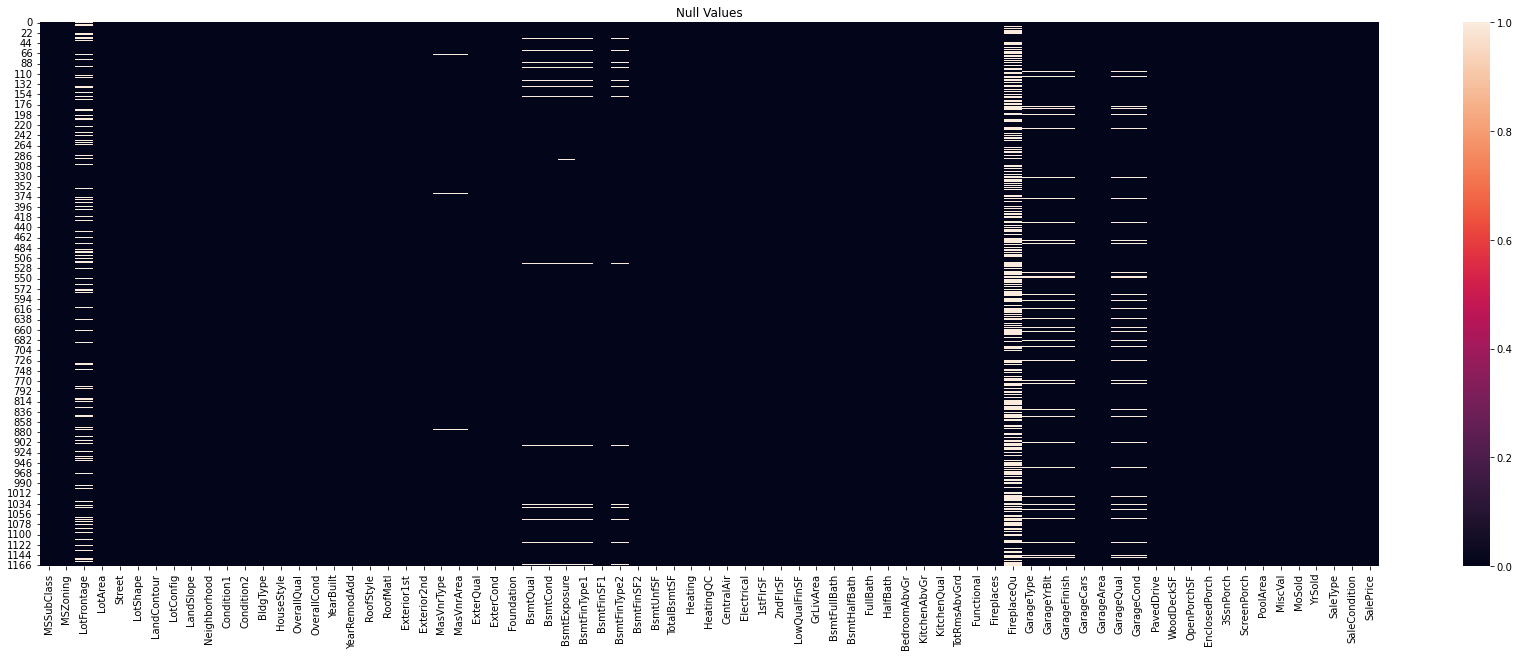

In [21]:
#Visualizeing null values in train dataset
plt.figure(figsize=[30,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

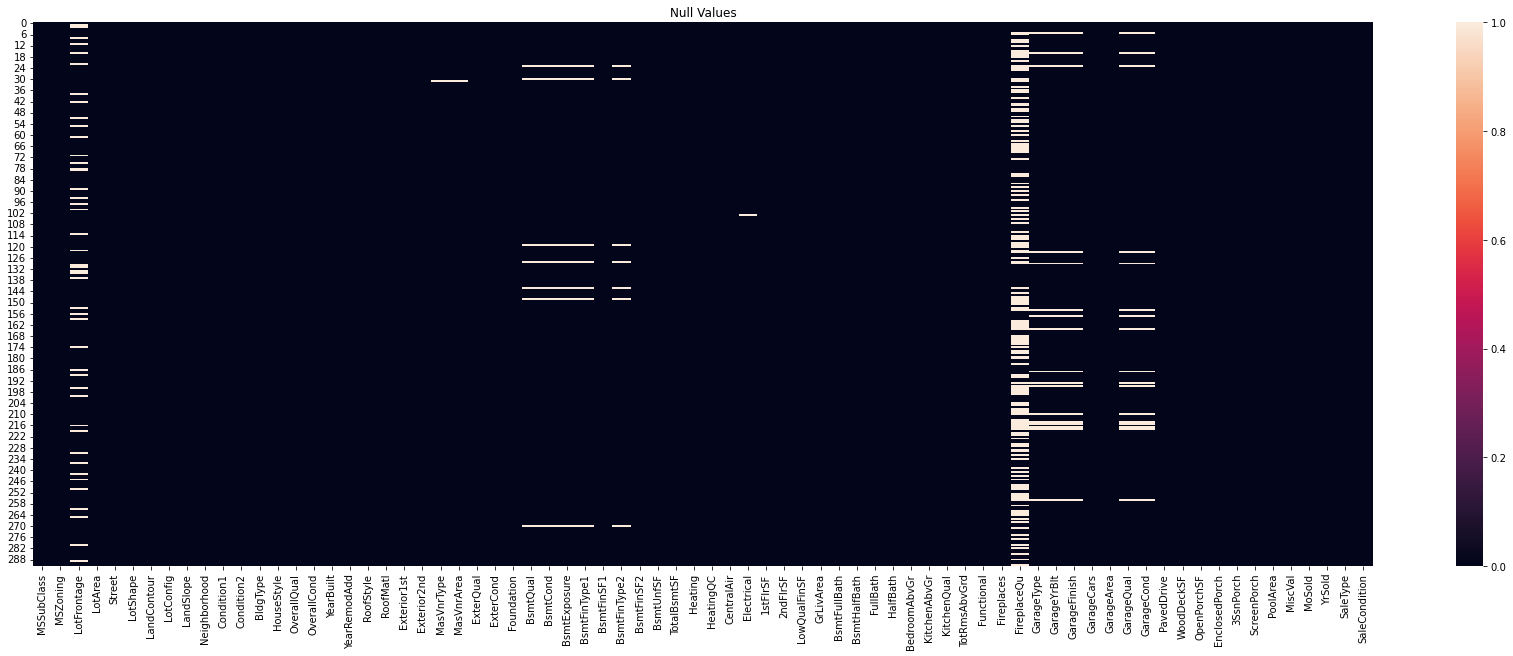

In [22]:
#Visualizeing null values in test dataset
plt.figure(figsize=[30,10])
sns.heatmap(dff.isnull())
plt.title("Null Values")
plt.show()

I can see the null values now clearly both in train and test datasets.

In [23]:
#Creating a list of categorical and numerical datatypes in train dataset
df_categorical=[]
df_numerical=[]
for col in df.columns:
    if (df[col].dtype=='object'):
          df_categorical.append(col)
    else:
        df_numerical.append(col)

In [24]:
#Creating a list of categorical and numerical datatypes in test dataset
dff_categorical=[]
dff_numerical=[]
for col in dff.columns:
    if (dff[col].dtype=='object'):
          dff_categorical.append(col)
    else:
        dff_numerical.append(col)

In [25]:
#Replacing null values of categorical column with mode of that column in train dataset.
catcol=df.columns.values
for i in range(0,len(catcol)):
    if df[catcol[i]].dtype == "object":
        df[catcol[i]].fillna(df[catcol[i]].mode()[0], inplace=True)

In [26]:
#Replacing null values of categorical column with mode of that column in test dataset.
catcol1=dff.columns.values
for i in range(0,len(catcol1)):
    if dff[catcol1[i]].dtype == "object":
        dff[catcol1[i]].fillna(dff[catcol1[i]].mode()[0], inplace=True)

In [27]:
#Replacing null values of numerical column with mean of that column in train dataset.
numcol=df.columns.values
for i in range(0,len(numcol)):
    if df[numcol[i]].dtype != "object":
        df[numcol[i]].fillna(df[numcol[i]].mean(), inplace=True)

In [28]:
#Replacing null values of numerical column with mean of that column in test dataset.
numcol1=dff.columns.values
for i in range(0,len(numcol1)):
    if dff[numcol1[i]].dtype != "object":
        dff[numcol1[i]].fillna(dff[numcol1[i]].mean(), inplace=True)

In [29]:
#Checking null values again in train dataset
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [30]:
#Checking null values again in test dataset
dff.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

There are null values in most of the columns in test dataset i have impute them with there respective values.

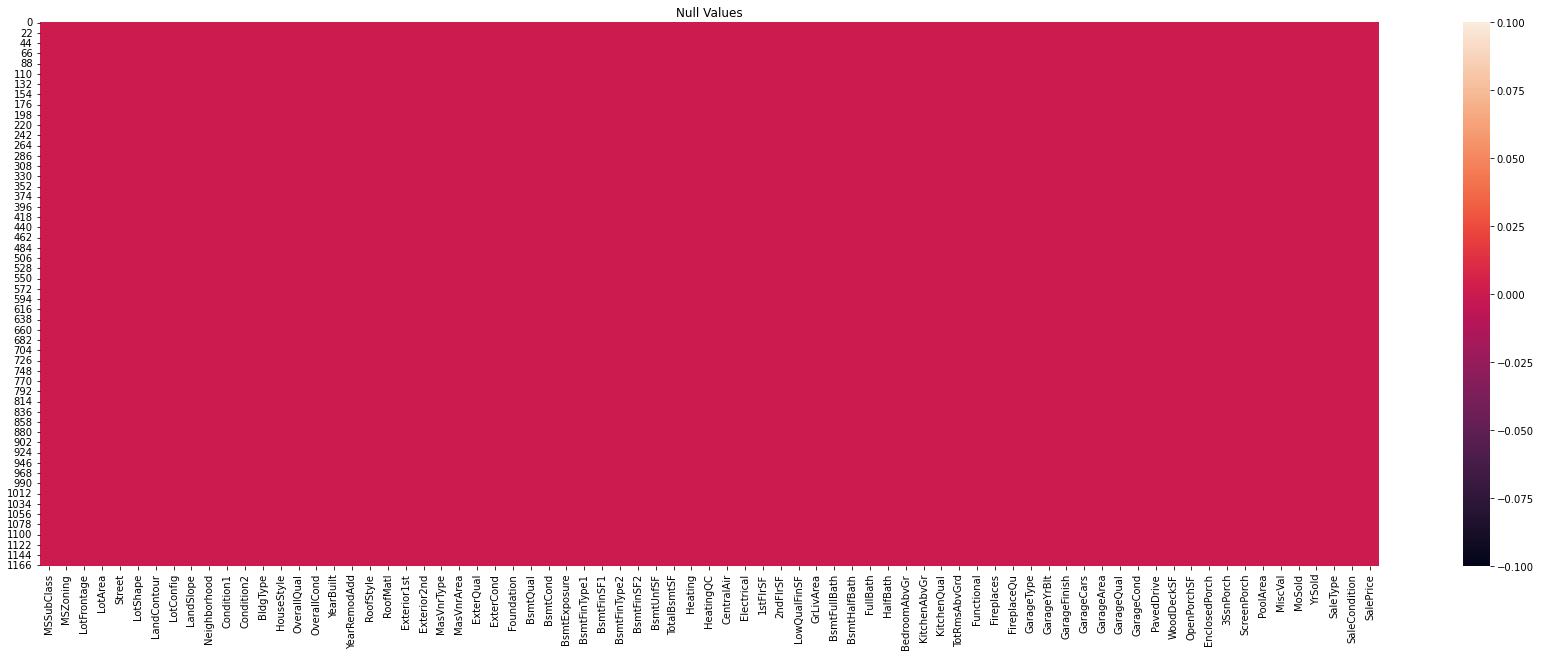

In [31]:
#Visualizeing null values in train dataset
plt.figure(figsize=[30,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

Now successfully i have replaced all null values in both train and test datasets.

In [32]:
#Checking for empty observations in target column
df.loc[df['SalePrice'] == " "]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

There is no empty observations in my target column.

In [33]:
# Converting years column to age column in train dataset
df['Year_SinceBuilt'] = df['YearBuilt'].max() - df['YearBuilt']
df['Year_SinceRemodAdded'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['Year_SinceSold'] = df['YrSold'].max() - df['YrSold']
df['GarageAge'] = df['GarageYrBlt'].max() - df['GarageYrBlt']

In [34]:
# Dropping old columns in train dataset
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [35]:
# Converting years column to age column in test dataset
dff['Year_SinceBuilt'] = dff['YearBuilt'].max() - dff['YearBuilt']
dff['Year_SinceRemodAdded'] = dff['YearRemodAdd'].max() - dff['YearRemodAdd']
dff['Year_SinceSold'] = dff['YrSold'].max() - dff['YrSold']
dff['GarageAge'] = dff['GarageYrBlt'].max() - dff['GarageYrBlt']

In [36]:
# Dropping old columns in test dataset
dff.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

I have converted all the year columns to there respective age, thinking that age will help us more than year in both train and test datasets.

In [37]:
#Checking description of data set in train dataset
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean    102.310078   444.726027    46.647260   569.721747  1061.095034   
std     182.047152   462.664785   163.520016   449.375525   442.272249   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   216.000000   799.000000   
50%       0.000000   385.500000     0.000000   474.000000  1005.500000   
75%     160.000000   714.500000     0.000000   816.000000  1291.500000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1168.000000  1168.000000   1168.000000  1168.000000   1168.000000   
mean   1169.860445   348.826199      6.380137  1525.066781      0.425514   
std     391.161983   439.696370     50.892844   528.042957      0.521615   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     892.000000     0.000000      0.000000  1143.250000      0.000000   
50%    1096.500000     0.000000      0.000000  1468.500000      0.000000   
75%    1392.000000   729.000000      0.000000  1795.000000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1168.000000  1168.000000  1168.000000   1168.000000   1168.000000   
mean       0.055651     1.562500     0.388699      2.884418      1.045377   
std        0.236699     0.551882     0.504929      0.817229      0.216292   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean       6.542808     0.617295     1.776541   476.860445    96.206336   
std        1.598484     0.650575     0.745554   214.466769   126.158988   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   338.000000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   171.000000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1168.000000    1168.000000  1168.000000  1168.000000  1168.000000   
mean     46.559932      23.015411     3.639555    15.051370     3.448630   
std      66.381023      63.191089    29.088867    55.080816    44.896939   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      24.000000       0.000000     0.000000     0.000000     0.000000   
75%      70.000000       0.000000     0.000000     0.000000     0.000

In [38]:
#Checking description of data set in test dataset
dff.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  292.000000   292.000000     292.000000   292.000000   292.000000   
mean    57.414384    66.425101   10645.143836     6.078767     5.493151   
std     43.780649    19.975962   13330.669795     1.356147     1.063267   
min     20.000000    21.000000    1526.000000     3.000000     3.000000   
25%     20.000000    57.750000    7200.000000     5.000000     5.000000   
50%     50.000000    66.425101    9200.000000     6.000000     5.000000   
75%     70.000000    76.000000   11658.750000     7.000000     6.000000   
max    190.000000   150.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count   292.000000   292.000000   292.000000   292.000000   292.000000   
mean    109.171821   439.294521    46.157534   557.315068  1042.767123   
std     174.729023   429.559675   152.467119   411.043768   424.561153   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   255.000000   771.750000   
50%       0.000000   369.500000     0.000000   487.000000   971.000000   
75%     180.000000   700.500000     0.000000   780.000000  1322.000000   
max    1031.000000  1767.000000  1085.000000  1935.000000  3094.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count   292.000000   292.000000    292.000000   292.000000    292.000000   
mean   1133.691781   339.657534      3.702055  1477.051370      0.424658   
std     366.941919   424.278825     38.219527   514.199429      0.508831   
min     372.000000     0.000000      0.000000   520.000000      0.000000   
25%     858.000000     0.000000      0.000000  1061.500000      0.000000   
50%    1047.500000     0.000000      0.000000  1440.000000      0.000000   
75%    1370.500000   717.000000      0.000000  1720.250000      1.000000   
max    2402.000000  1589.000000    479.000000  3447.000000      2.000000   

       BsmtHalfBath    FullBath    HalfBath  BedroomAbvGr  KitchenAbvGr  \
count    292.000000  292.000000  292.000000    292.000000     292.00000   
mean       0.065068    1.575342    0.359589      2.794521       1.05137   
std        0.247070    0.547856    0.494795      0.807336       0.23616   
min        0.000000    0.000000    0.000000      0.000000       1.00000   
25%        0.000000    1.000000    0.000000      2.000000       1.00000   
50%        0.000000    2.000000    0.000000      3.000000       1.00000   
75%        0.000000    2.000000    1.000000      3.000000       1.00000   
max        1.000000    3.000000    2.000000      6.000000       3.00000   

       TotRmsAbvGrd  Fireplaces  GarageCars   GarageArea  WoodDeckSF  \
count    292.000000  292.000000  292.000000   292.000000  292.000000   
mean       6.417808    0.595890    1.729452   457.458904   86.397260   
std        1.728105    0.621259    0.754430   210.785591  121.898836   
min        3.000000    0.000000    0.000000     0.000000    0.000000   
25%        5.000000    0.000000    1.000000   300.000000    0.000000   
50%        6.000000    1.000000    2.000000   467.500000    0.000000   
75%        7.000000    1.000000    2.000000   569.750000  149.250000   
max       12.000000    2.000000    4.000000  1052.000000  728.000000   

       OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch  PoolArea  \
count   292.000000     292.000000  292.000000   292.000000     292.0   
mean     47.061644      17.708904    2.489726    15.099315       0.0   
std      65.865449      51.892906   30.247488    58.483473       0.0   
min       0.000000       0.000000    0.000000     0.000000       0.0   
25%       0.000000       0.000000    0.000000     0.000000       0.0   
50%      28.500000       0.000000    0.000000     0.000000       0.0   
75%      66.000000       0.000000    0.000000     0.000000       0.0   
max     418.000000     330.000000  407.000000   396.000000       0.0   

     

Above is the statistics about the train and test datasets.The mean and the 2nd quantile values are not same in some columns so there is extreme outliers in the dataset.

# Visualization:

# Univariate Analysis:

In [39]:
# checking for categorical columns in train dataset
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


Above are the list of categorical columns in the train data set.

In [40]:
# checking for categorical columns in test dataset
categorical_columns1=[]
for i in dff.dtypes.index:
    if dff.dtypes[i]=='object':
        categorical_columns1.append(i)
print(categorical_columns1)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


Above are the list of categorical columns in the test data set.

In [41]:
# Now checking for numerical columns in train dataset
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_SinceSold', 'GarageAge']


Above are the numerical columns in the test data set.

In [42]:
# Now checking for numerical columns in test dataset
numerical_columns1=[]
for i in dff.dtypes.index:
    if dff.dtypes[i]!='object':
        numerical_columns1.append(i)
print(numerical_columns1)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_SinceSold', 'GarageAge']


Above are the numerical columns in the test data set.

# Univariate analysis for numerical columns:

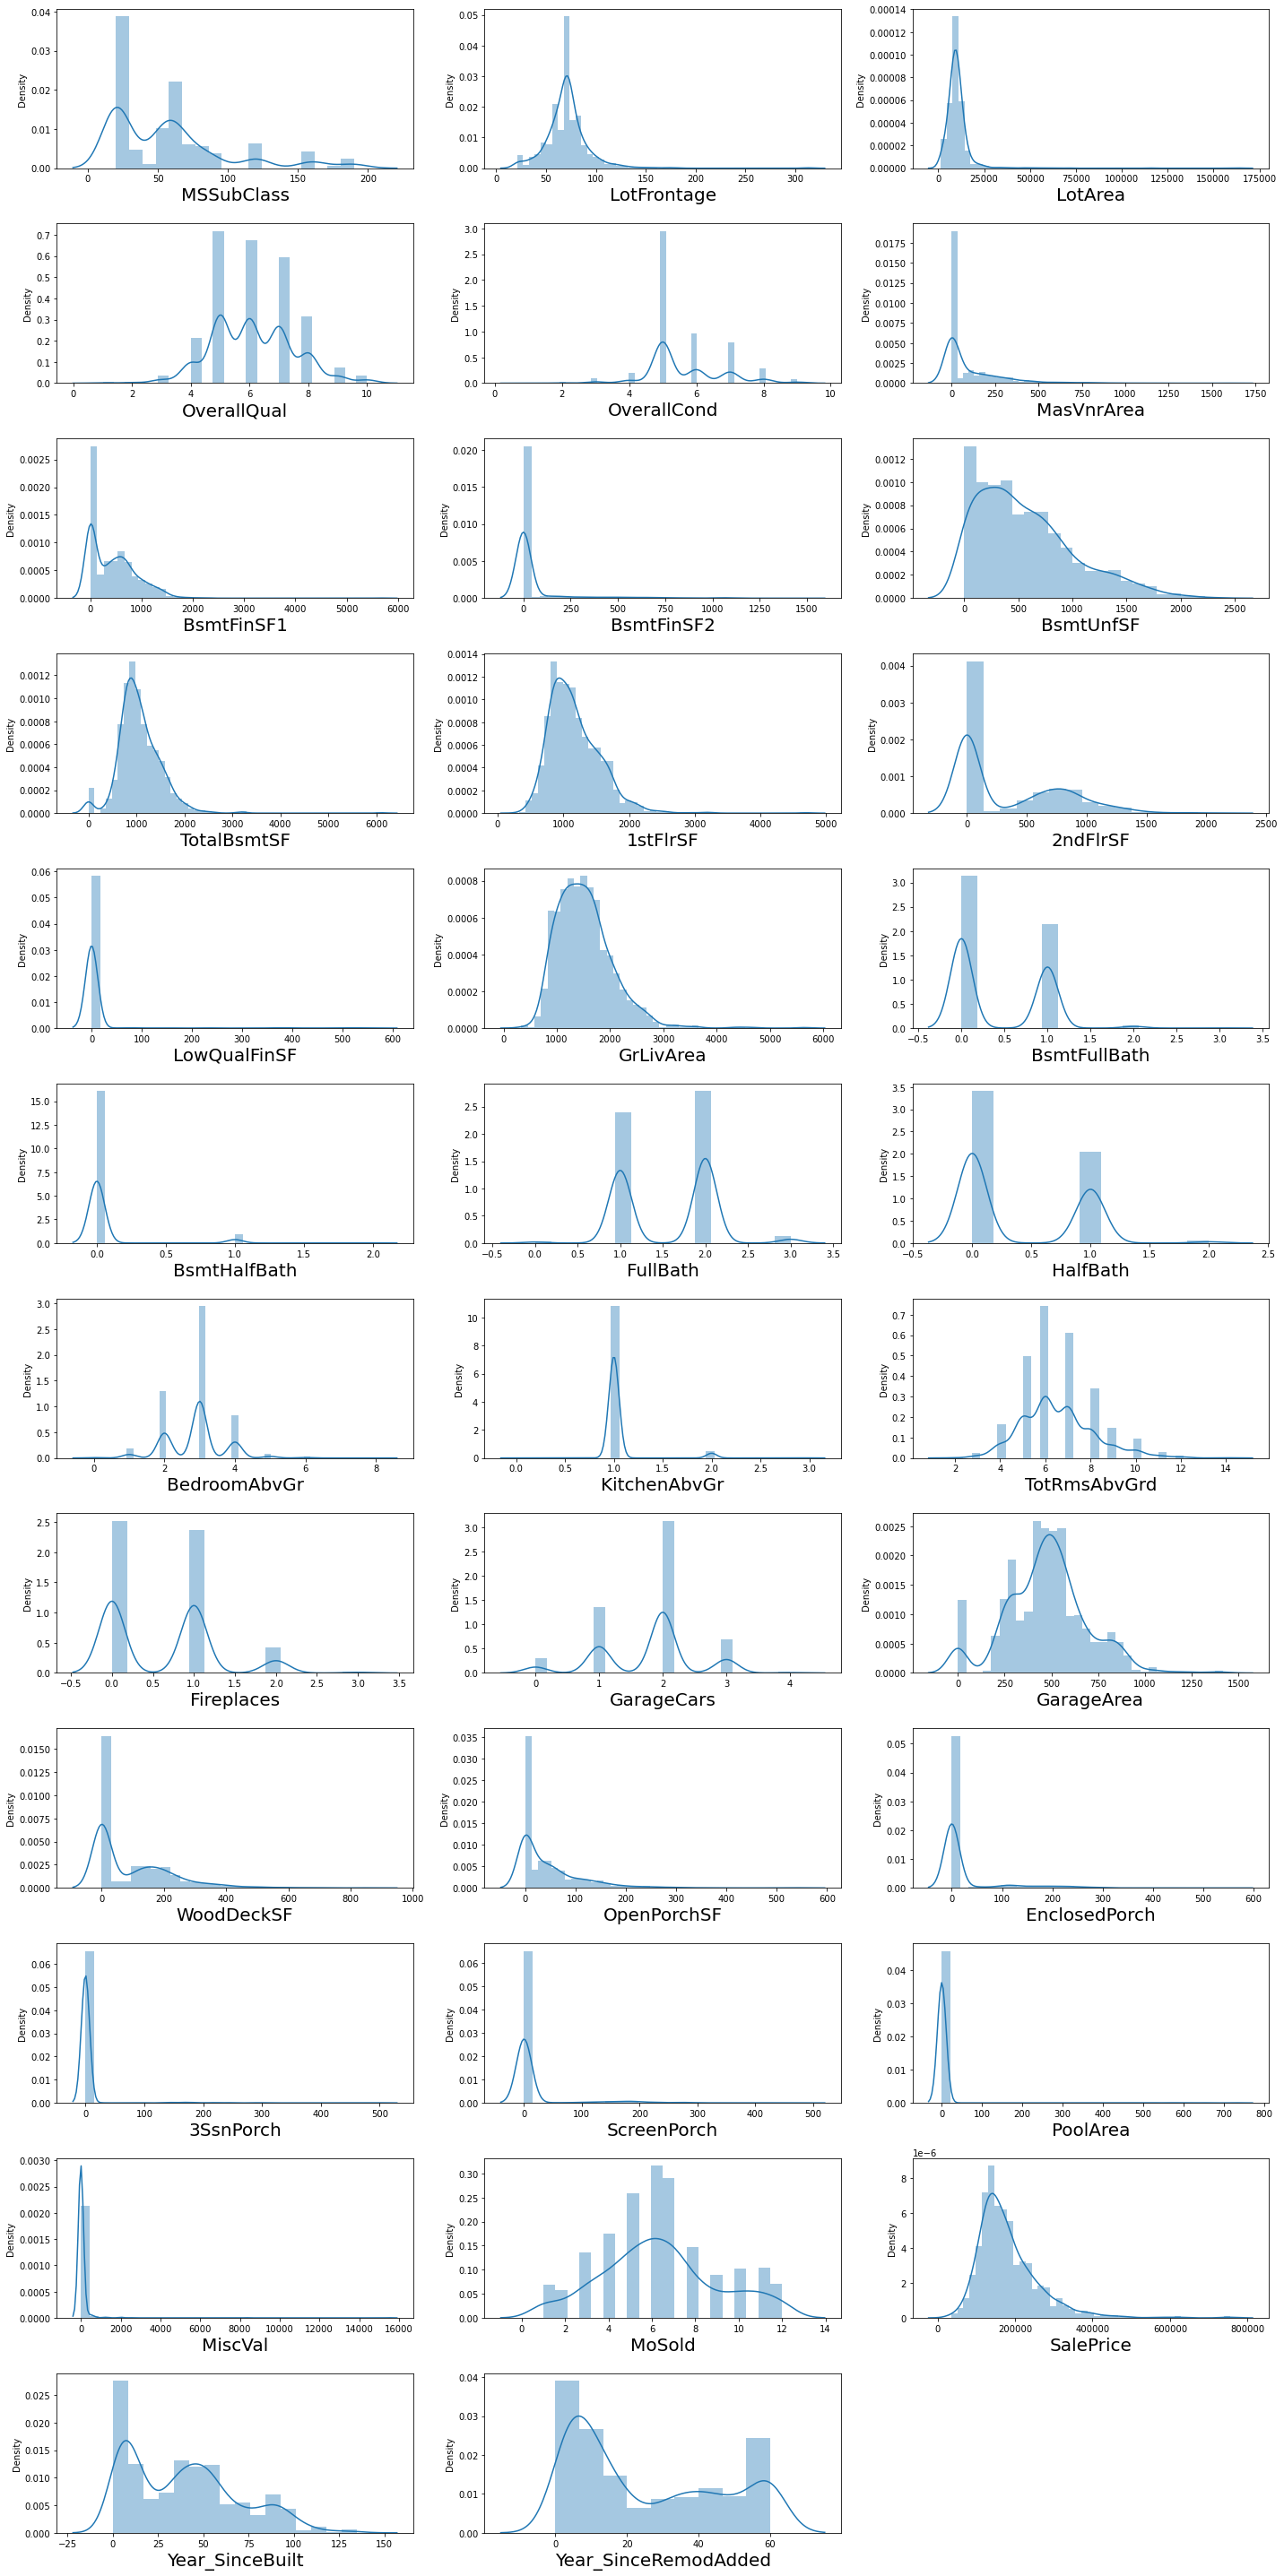

In [43]:
#Distribution plot for all numerical columns
plt.figure(figsize = (20,40))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=35:
        ax = plt.subplot(12,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

There is skewness in almost all numerical columns.I have to remove this skewness.

# Univariate analysis for categorical columns:

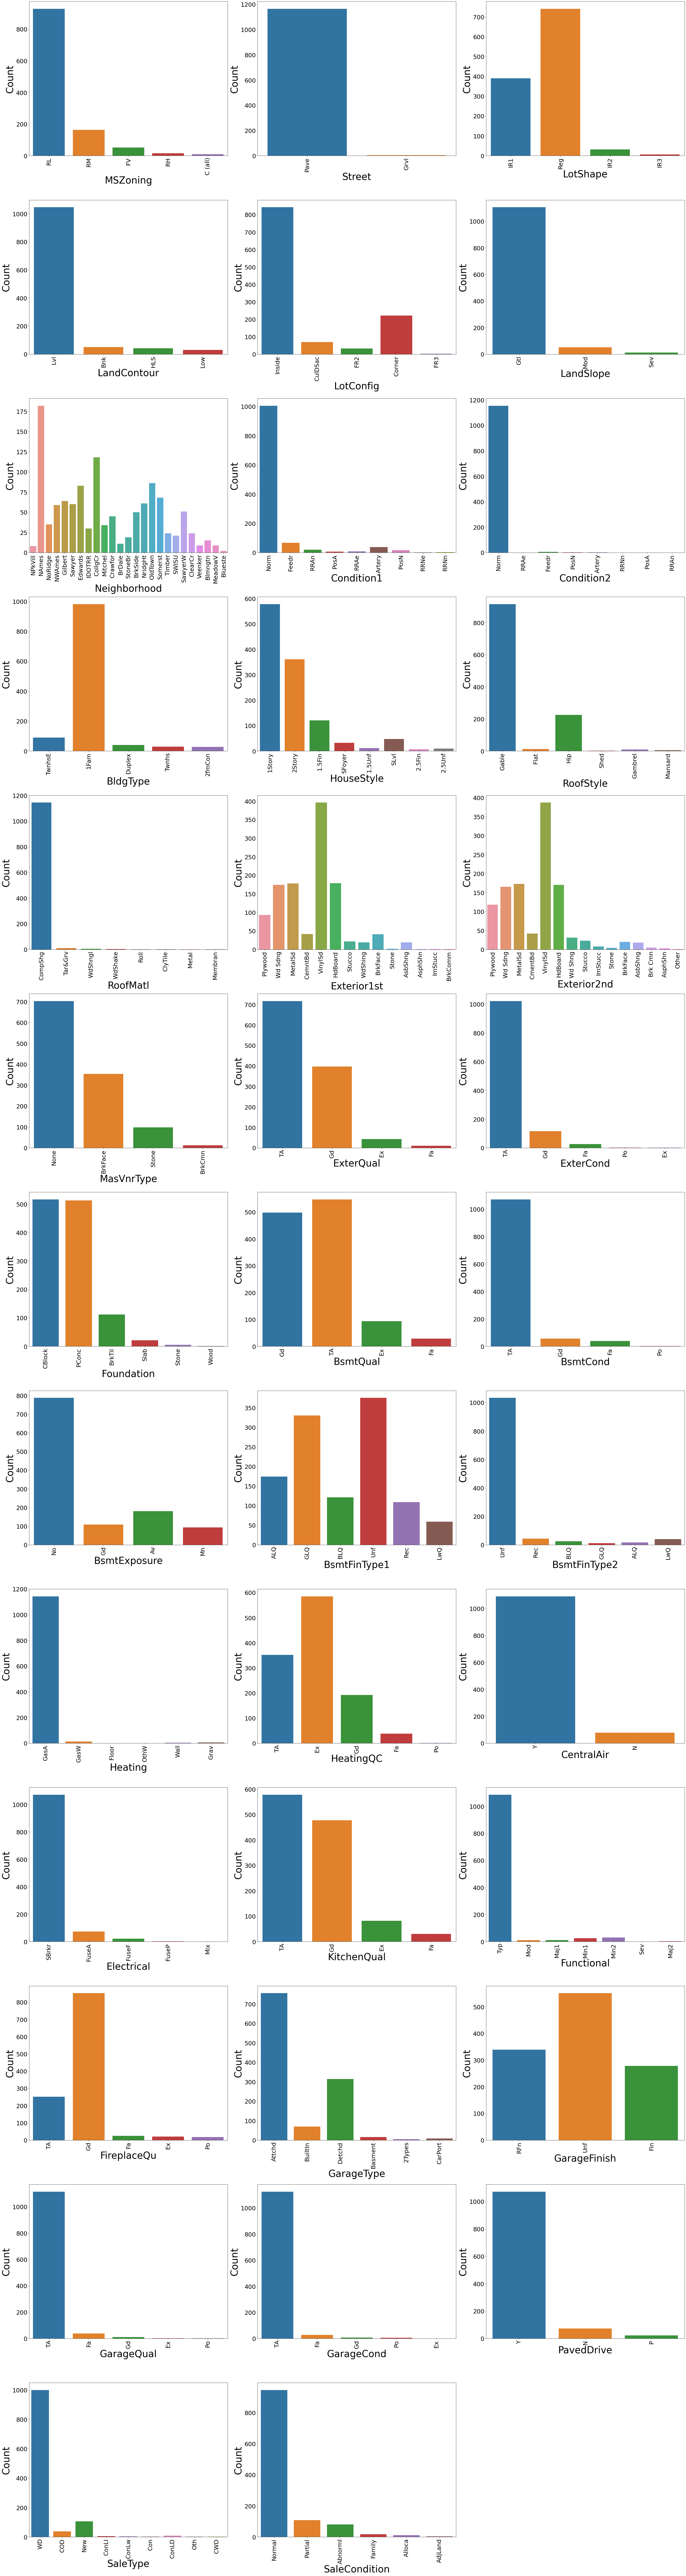

In [44]:
#Bar plot for all categorical columns
plt.figure(figsize = (40,150))
plotnumber = 1
for column in df[categorical_columns]:
    if plotnumber <=39:
        ax = plt.subplot(13,3,plotnumber)
        sns.countplot(df[column])
        plt.xticks(rotation=90,fontsize = 25)
        plt.yticks(rotation=0,fontsize = 25)
        plt.xlabel(column,fontsize = 40)
        plt.ylabel('Count',fontsize = 40)
    plotnumber+=1
plt.tight_layout()

Observations:

1. It is found that Residential Low Density zoning has maximum count, for the feature general zoning classification of the sale(MSZoning).
2. In Paved streets we can observe maximum count, for the feature Type of road access to property(Street).
3. Regular shaped property has maximum count, for the feature General shape of property(LotShape).
4. Near Flat/Level property has maximum count, for the feature Flatness of the property(LandContour).
5. Inside lot configured property has maximum count, for the feature Lot configuration(LotConfig).
6. Gentle sloped property has maximum count, for the feature Slope of property(LandSlope).
7. If the property is located in North Ames then count is good compared to other locations, for the feature Physical locations within Ames city limits(Neighborhood).
8. If the Proximity to various conditions-1 is normal then count is high for the feature Proximity to various conditions(Condition1).
9. If the Proximity to various conditions-2 is normal then count is high for the feature Proximity to various conditions (if more than one is present)(Condition2).
10.Single-family Detached dwelling has maximum count for the feature Type of dwelling(BldgType).
11.One story dwelling housestyle has maximum count for the feature Style of dwelling(HouseStyle).
12.For Gable roof style the count is high for the feature Type of roof(RoofStyle).
13.For Standard (Composite) Shingle roof material the count is high for the feature Roof material(RoofMatl).
14.For Vinyl Siding exterior-1 covering on house has maximum counts for the feature Exterior covering on house(Exterior1st).
15.For Vinyl Siding exterior-2 covering on house has maximum counts for the feature Exterior covering on house (if more than one material)(Exterior2nd).
16.For Masonry veneer type(MasVnrType) None has maximum count.
17.For Typical/Average(TA) quality of the material on the exterior has maximum count, for the feature Evaluates the quality of the material on the exterior (ExterQual).
18.For Typical/Average(TA) condition of the material on the exterior has maximum count for the feature Evaluates the present condition of the material on the exterior(ExterCond).
19.For Cinder Block and Poured Contrete foundations the count is maximum for the feature Type of foundation(Foundation).
20.For good and average quality heights of the basement the count is high for the feature Evaluates the height of the basement(BsmtQual).
21.For Typical/Average(TA) general condition of the basement the count is high for the feature Evaluates the general condition of the basement(BsmtCond)
22.For No Exposure garden level walls the count is maximum for the feature Refers to walkout or garden level walls(BsmtExposure).
23.For unfinished Rating of basement finished area-1 the count is maximum for the feature Rating of basement finished area(BsmtFinType1).
24.For unfinished Rating of basement finished area-2 the count is maximum for the feature Rating of basement finished area (if multiple types)(BsmtFinType2).
25.For Gas forced warm air furnace type of heating the count is maximum for the feature Type of heating(Heating).
26.For Excellent Heating quality and condition the count is high for the feature Heating quality and condition(HeatingQC).
27.For Central air conditioning-yes has maximum count for the feature Central air conditioning(CentralAir).
28.For Standard Circuit Breakers & Romex Electrical system the count is high for the feature Electrical system(Electrical).
29.For Typical/Average(TA) and good Kitchen quality the count is maximum for the feature Kitchen quality(KitchenQual).
30.Typical Functionality has highest count for Home functionality (Assume typical unless deductions are warranted)(Functional).
31.For good Fireplace quality the count is high for the feature Fireplace quality(FireplaceQu).
32.If Garage location Attached to home then the count is high, for the feature Garage location(GarageType).
33.For Unfinished Interior of the garage the count is maximum, for the feature Interior finish of the garage(GarageFinish).
34.For Typical/Average(TA) Garage quality the count is high, for the feature Garage quality(GarageQual).
35.For Typical/Average(TA) Garage condition the count is high, for the feature Garage condition(GarageCond).
36.For Paved driveway the count is maximum, for the feature Paved driveway(PavedDrive).
37.For Warranty Deed - Conventional type of sales the count is maximum, for the feature Type of sale(SaleType).
38.For Normal sales condition the count is high, for the feature Condition of sale(SaleCondition).

# Bivariate Analysis:

# Bivariate Analysis for numerical columns:

In [45]:
col=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF']

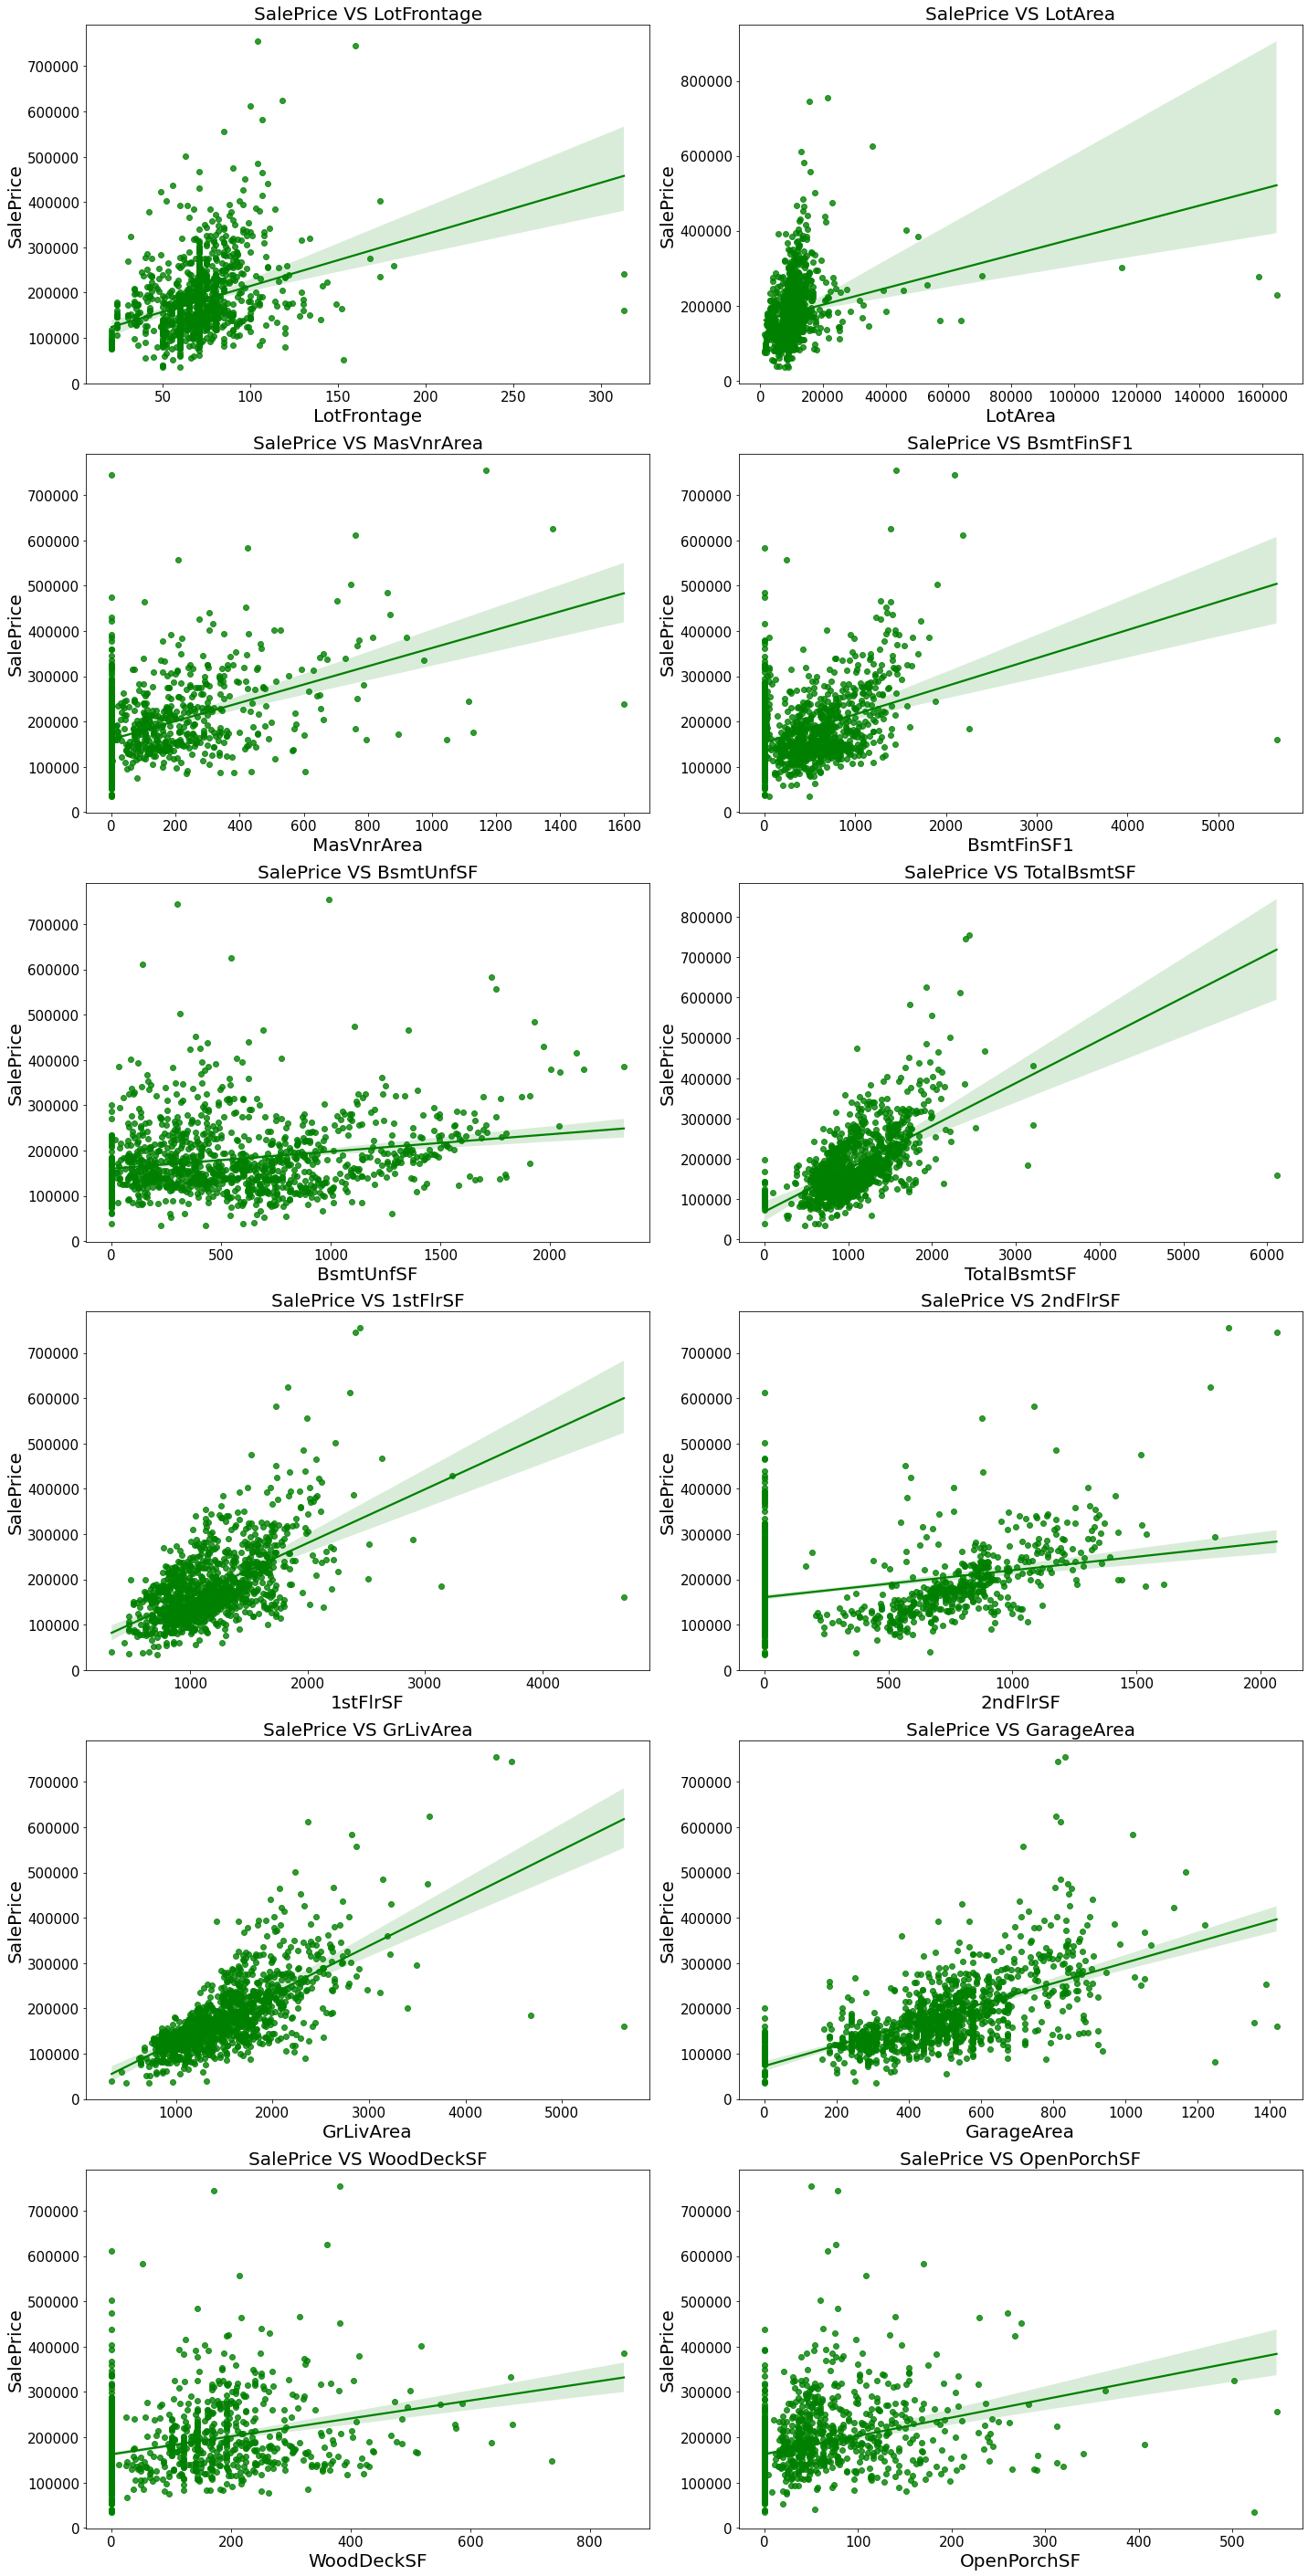

In [46]:
#regplot for numerical columns
plt.figure(figsize=(20,130))
for i in range(len(col)):
    plt.subplot(20,2,i+1)
    sns.regplot(x=df[col[i]] , y=df['SalePrice'],color="g")
    plt.title(f"SalePrice VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col[i],fontsize = 20)
    plt.ylabel('SalePrice',fontsize = 20)
    plt.tight_layout()

Observations:

1.As Linear feet of street connected to property(LotFrontage) is increseing sales is decreasing and the SalePrice is rangeing between 0-3 lakhs.

2.As Lot size in square feet(LotArea) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.

3.As Masonry veneer area in square feet(MasVnrArea) is increasing sales is decreasing and saleprice is rangeing between 0-4 lakhs.

4.As Type 1 finished square feet(BsmtFinSF1) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.

5.As Unfinished square feet of basement area(BsmtUnfSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs. There are some outliers also.

6.As Total square feet of basement area(TotalBsmtSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.

7.As First Floor square feet(1stFlrSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.

8.As Second floor square feet(2ndFlrSF) is increseing sales is increasing in the range 500-1000 and the saleprice is in between 0-4 lakhs.

9.As Above grade (ground) living area square feet(GrLivArea) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.

10.As Size of garage in square feet(GarageArea) is increseing sales is increseing and the saleprice is in between 0-4 lakhs.

11.As Wood deck area in square feet(WoodDeckSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.

12.As Open porch area in square feet(OpenPorchSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.

13.As Year_SinceBuilt is increseing sales is decreasing and the saleprice is high for newly built building and the sales price is in between 0-4 lakhs.

14.As Since Remodel date (same as construction date if no remodeling or additions)(Year_SinceRemodAdded) is increseing sales is decreasing and the saleprice is in between 1-4 lakhs.

15.As Since Year garage was built(GarageAge) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.

In [47]:
col1=['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars']

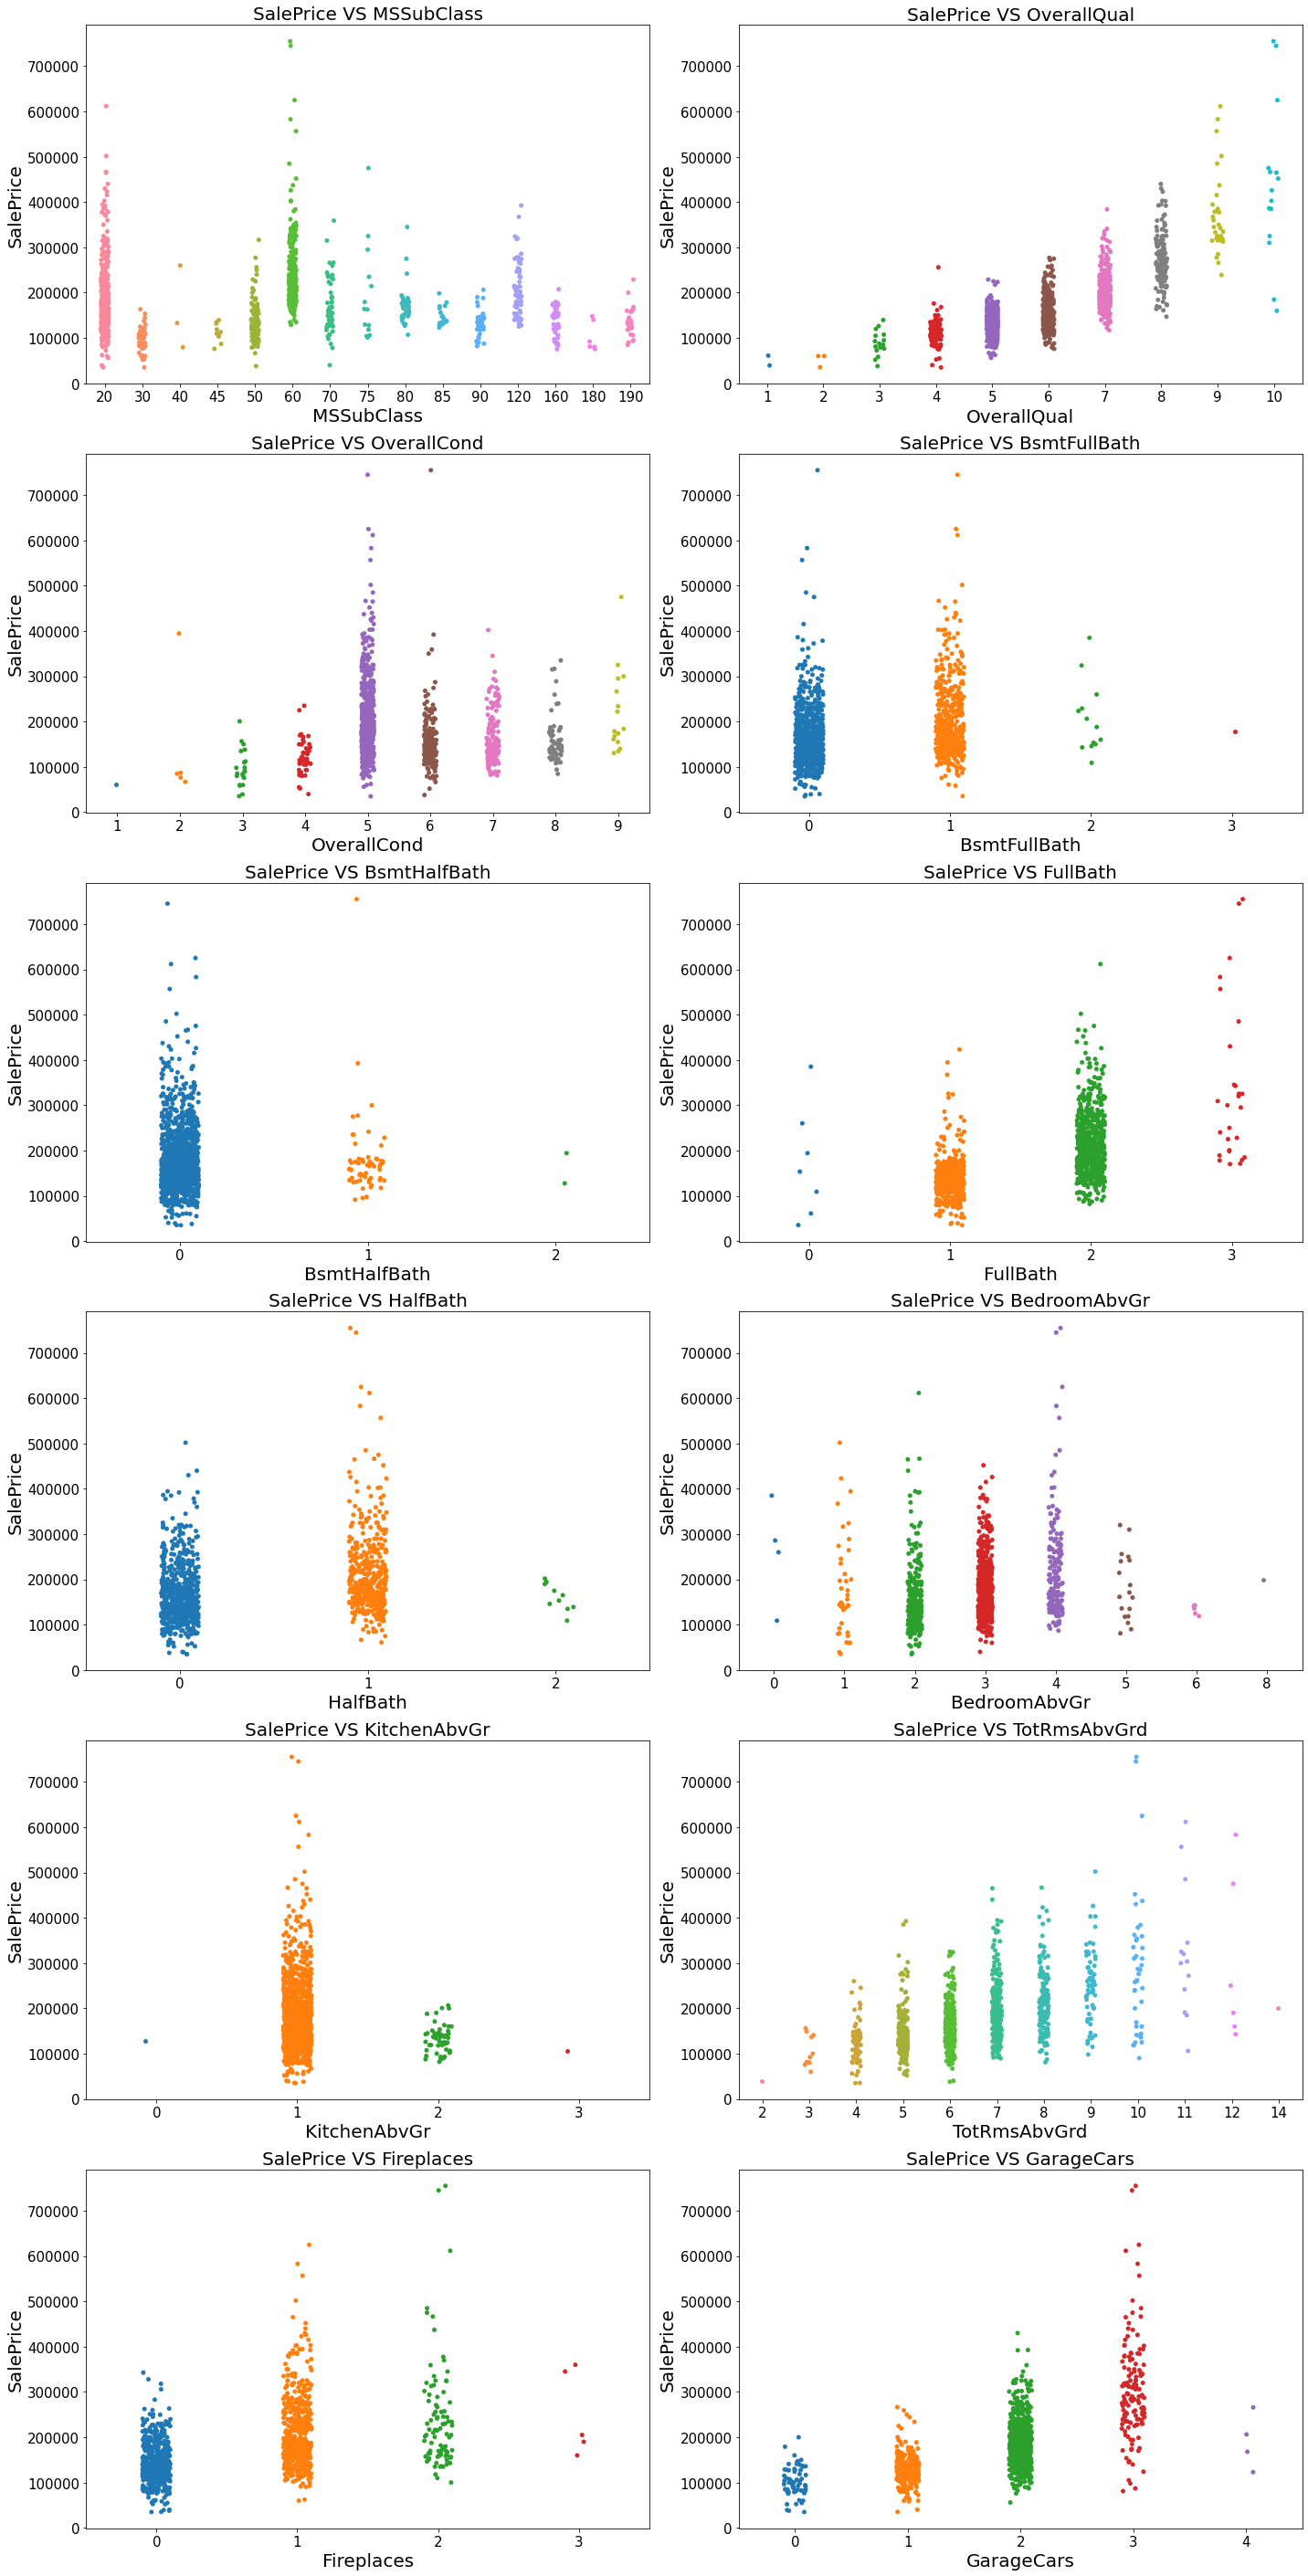

In [48]:
#stripplot for numerical columns
plt.figure(figsize=(20,130))
for i in range(len(col1)):
    plt.subplot(20,2,i+1)
    sns.stripplot(x=df[col1[i]] , y=df['SalePrice'])
    plt.title(f"SalePrice VS {col1[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col1[i],fontsize = 20)
    plt.ylabel('SalePrice',fontsize = 20)
    plt.tight_layout()

Observations:

1.For 1-STORY 1946 & NEWER ALL STYLES(20) and 2-STORY 1946 & NEWER(60) types of dwelling(MSSuubClass) the sales is good and SalePrice is also high.

2.As Rates the overall material and finish of the house(OverallQual) is increasing linearly sales is also increasing And SalePrice is also increasing linearly.

3.For 5(Average) overall condition of the house(OverallCond) the sales is high and SalePrice is also high.

4.For 0 and 1 Basement full bathrooms(BsmtFullBath) the sales as well as SalePrice is high.

5.For 0 Basement half bathrooms(BsmtHalfBath) the sales as well as SalePrice is high.

6.For 1 and 2 Full bathrooms above grade(FullBath) the sales as well as SalePrice is high.

7.For 0 and 1 Half baths above grade(HalfBath) the sales as well as SalePrice is high.

8.For 2, 3 and 4 Bedrooms above grade (does NOT include basement bedrooms)(BedroomAbvGr) the sales as well as SalePrice is high.

9.For 1 Kitchens above grade(KitchenAbvGr) the sales as well as SalePrice is high.

10.For 4-9 Total rooms above grade (does not include bathrooms)(TotRmsAbvGrd) the sales as well as SalePrice is high.

11.For 0 and 1 Number of fireplaces(Fireplaces) the sales as well as SalePrice is high.

12.For 1 and 2 Size of garage in car capacity(GarageCars) the sales is high and for 3 Size of garage in car capacity(GarageCars) the SalePrice is high.

13.In between april to august for Month Sold(MoSold) the sales is good with SalePrice.

14.For all the Year_SinceSold the salePrice and sales both are same.

# Bivariate Analysis for Categorical Columns:

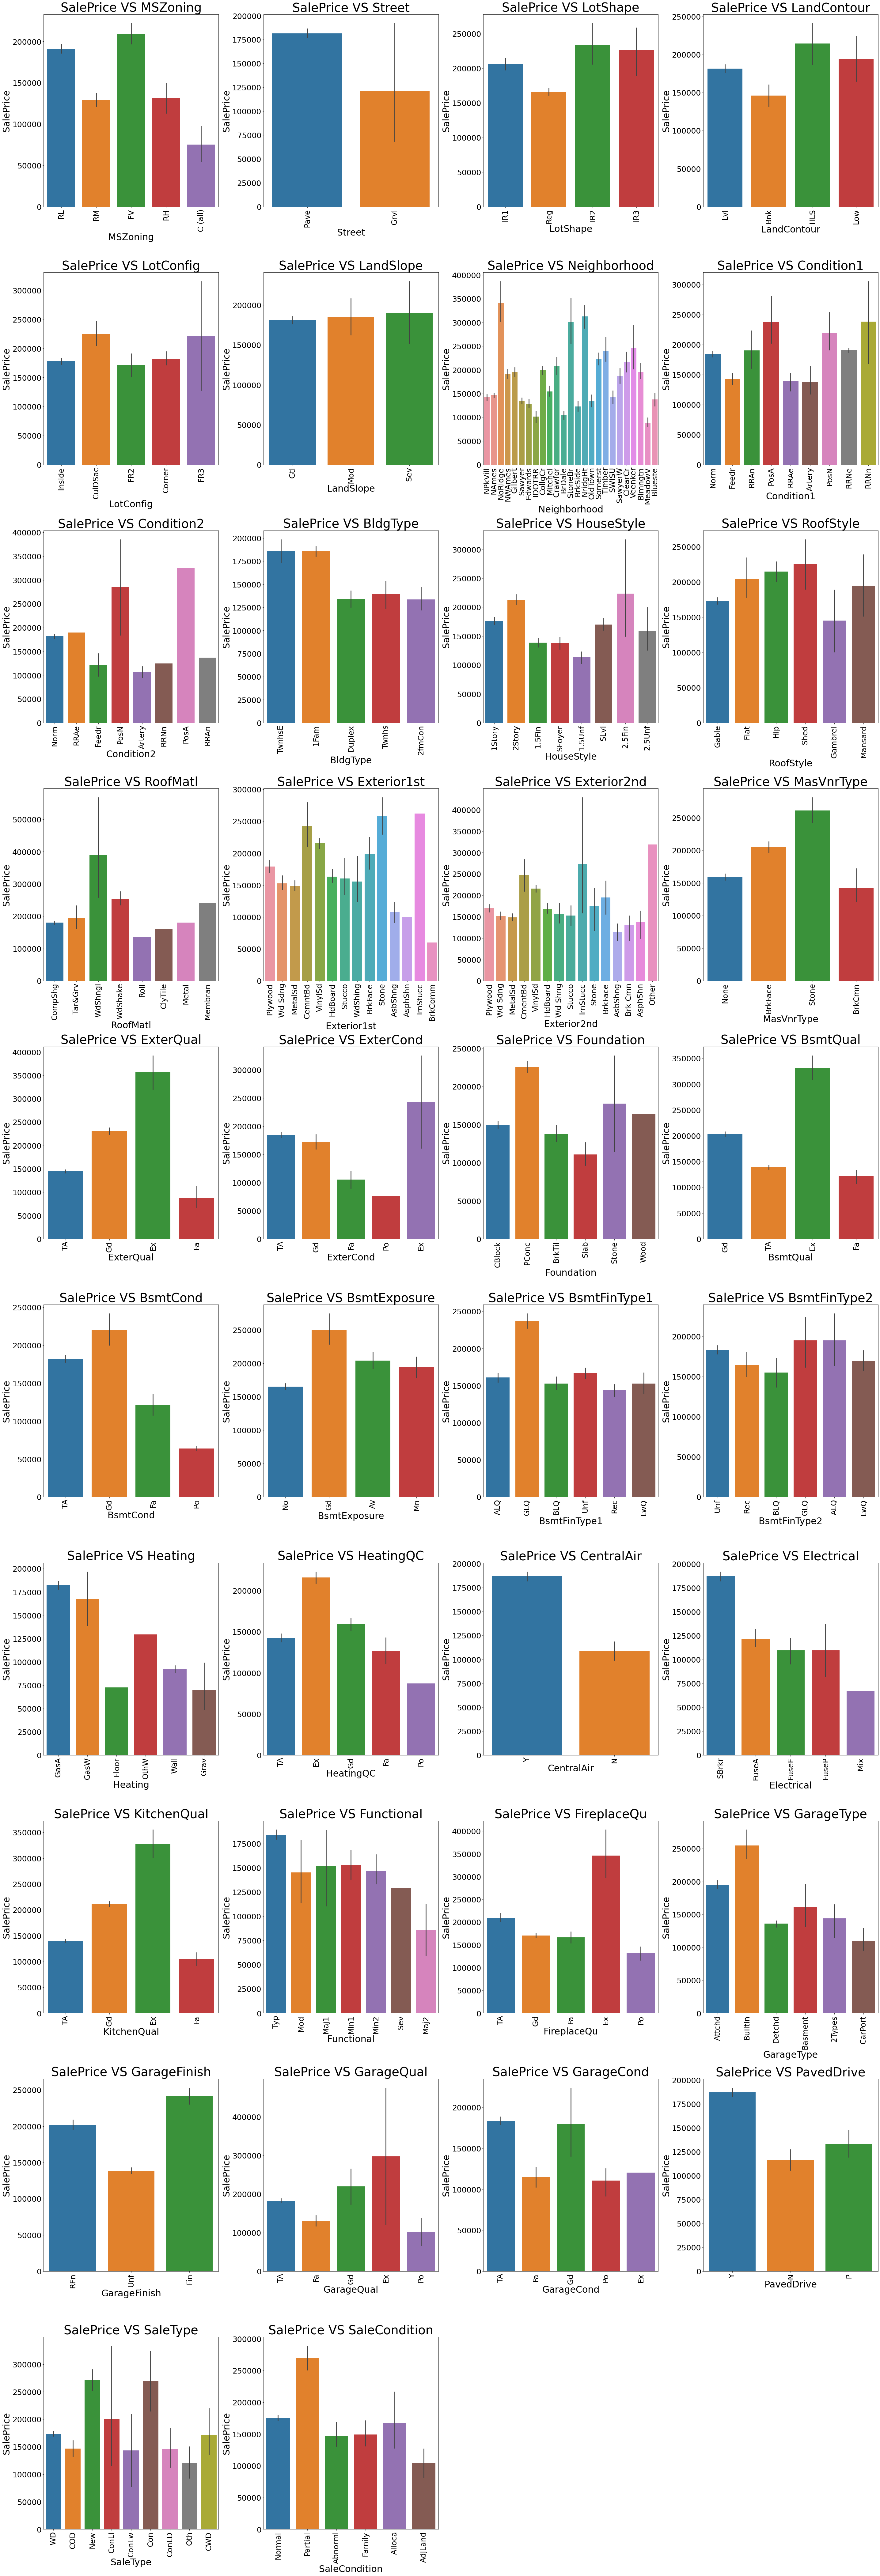

In [49]:
#Bar plot for all categorical columns
plt.figure(figsize=(40,150))
for i in range(len(categorical_columns)):
    plt.subplot(13,4,i+1)
    sns.barplot(y=df['SalePrice'],x=df[categorical_columns[i]])
    plt.title(f"SalePrice VS {categorical_columns[i]}",fontsize=40)
    plt.xticks(rotation=90,fontsize=25)  
    plt.yticks(rotation=0,fontsize=25)
    plt.xlabel(categorical_columns[i],fontsize = 30)
    plt.ylabel('SalePrice',fontsize = 30)
    plt.tight_layout()

servations:

1. For Floating Village Residential(FV) and Residential Low Density(RL) zoning classification of the sale(MSZoning) the saleprice is high.
2. For paved type of road access to property(Street) the SalePrice is high.
3. For Slightly irregular(IR1), Moderately Irregular(IR2) and Irregular(IR3) shape of property(LotShape) the SalePrice is high.
4. For Hillside - Significant slope from side to side(HLS) Flatness of the property(LandContour) the SalePrice is High.
5. For Cul-de-sac(CulDSac) Lot configuration(LotConfig) the SalePrice is High.
6. For all types of Slope of property(LandSlope) i.e.,Gentle slope(Gtl), Moderate Slope(Mod) and Severe Slope(Sev) the SalePrice is High.
7. For Northridge(NoRidge) locations within Ames city limits(Neighborhood) the SalePrice is High.
8. For Within 200' of North-South Railroad(RRNn), Adjacent to postive off-site feature(PosA) and Near positive off-site feature--park, greenbelt, etc.(PosN) Proximity to various conditions(Condition1) has the maximum SalePrice.
9. For Adjacent to postive off-site feature(PosA) and Near positive off-site feature--park, greenbelt, etc.(PosN) Proximity to various conditions (if more than one is present)(Condition2) has maximum SalePrice.
10.For Single-family Detached(1Fam) and Townhouse End Unit(TwnhsE) type of dwelling(BldgType) the SalePrice is high.
11.For 2Story and Two and one-half story: 2nd level finished(2.5Fin) Style of dwelling(HouseStyle) the SalePrice is high.
12.For Shed Type of roof(RoofStyle) the SalePrice is high.
13.For Wood Shingles(WdShngl) Roof material(RoofMat1) the SalePrice is high.
14.For Cement Board(CemntBd), Imitation Stucco(ImStucc) and Stone type of Exterior covering on house(Exterior1st) the SalePrice is high.
15.For Cement Board(CemntBd), Imitation Stucco(ImStucc) and other Exterior covering on house (if more than one material)(Exterior2) has maximum SalePrice.
16.For Stone Masonry veneer type(MasvnrType) the SalePrice is high.
17.For Excellent(Ex) quality of the material on the exterior(ExterQual) the SalePrice is high.
18.For Excellent(Ex) present condition of the material on the exterior(ExterCond) the SalePrice is high.
19.For Poured Contrete(PConc) Type of foundation(Foundation) the SalePrice is high.
20.For Excellent(100+ inches)(Ex) height of the basement(BsmtQual) the SalePrice is high.
21.For Good(Gd) general condition of the basement(BsmtCond) the SalePrice is high.
22.For Good Exposure(Gd) of walkout or garden level walls(BsmtExposure) has maximum SalePrice.
23.For Good Living Quarters(GLQ) of basement finished area(BsmtFinType1) has maximum SalePrice.
24.For Good Living Quarters(GLQ) and Average Living Quarters(ALQ) of basement finished area (if multiple types)(BsmtFinType2) has maximum SalePrice.
25.For Gas forced warm air furnace(GasA) and Gas hot water or steam heat(GasW) Type of heating(Heating) has high SalePrice.
26.For Excellent(Ex) Heating quality and condition(HeatingQC) the SalePriceis high.
27.For building having Central air conditioning(CentralAir) the SalePrice is high.
28.For Standard Circuit Breakers & Romex(Sbrkr) of Electrical system(Electrical) the SalePrice is Maximum.
29.For Excellent(Ex) Kitchen quality(KitchenQual) the SalePrice is high.
30.For Typical Functionality(Typ) type of Home functionality (Assume typical unless deductions are warranted)(Functional) the SalePrice is high.
31.For Excellent - Exceptional Masonry Fireplace(Ex) of Fireplace quality(FireplaceQual) has highest SalePrice.
32.For Built-In (Garage part of house - typically has room above garage)(BuiltIn) Garage location(GarageType) the SalePrice is maximum.
33.For Completely finished(Fin) Interior of the garage(GarageFinish) the SalePrice is high.
34.For Excellent(Ex) Garage quality(GarageQual) the SalePrice is high.
35.For Typical/Average(TA) and Good(Gd) Garage condition(GarageCond) the SalePrice is high.
36.For having Paved driveway(PavedDrive) the SalePriceis high.
37.For Home just constructed and sold(New) and Contract 15% Down payment regular terms(Con) of type of sale(SaleType) has highest SalePrice.
38.For Home was not completed when last assessed (associated with New Homes)(Partial) Condition of sale(SalesCondition) the SalePrice is maximum

# Checking for outliers:

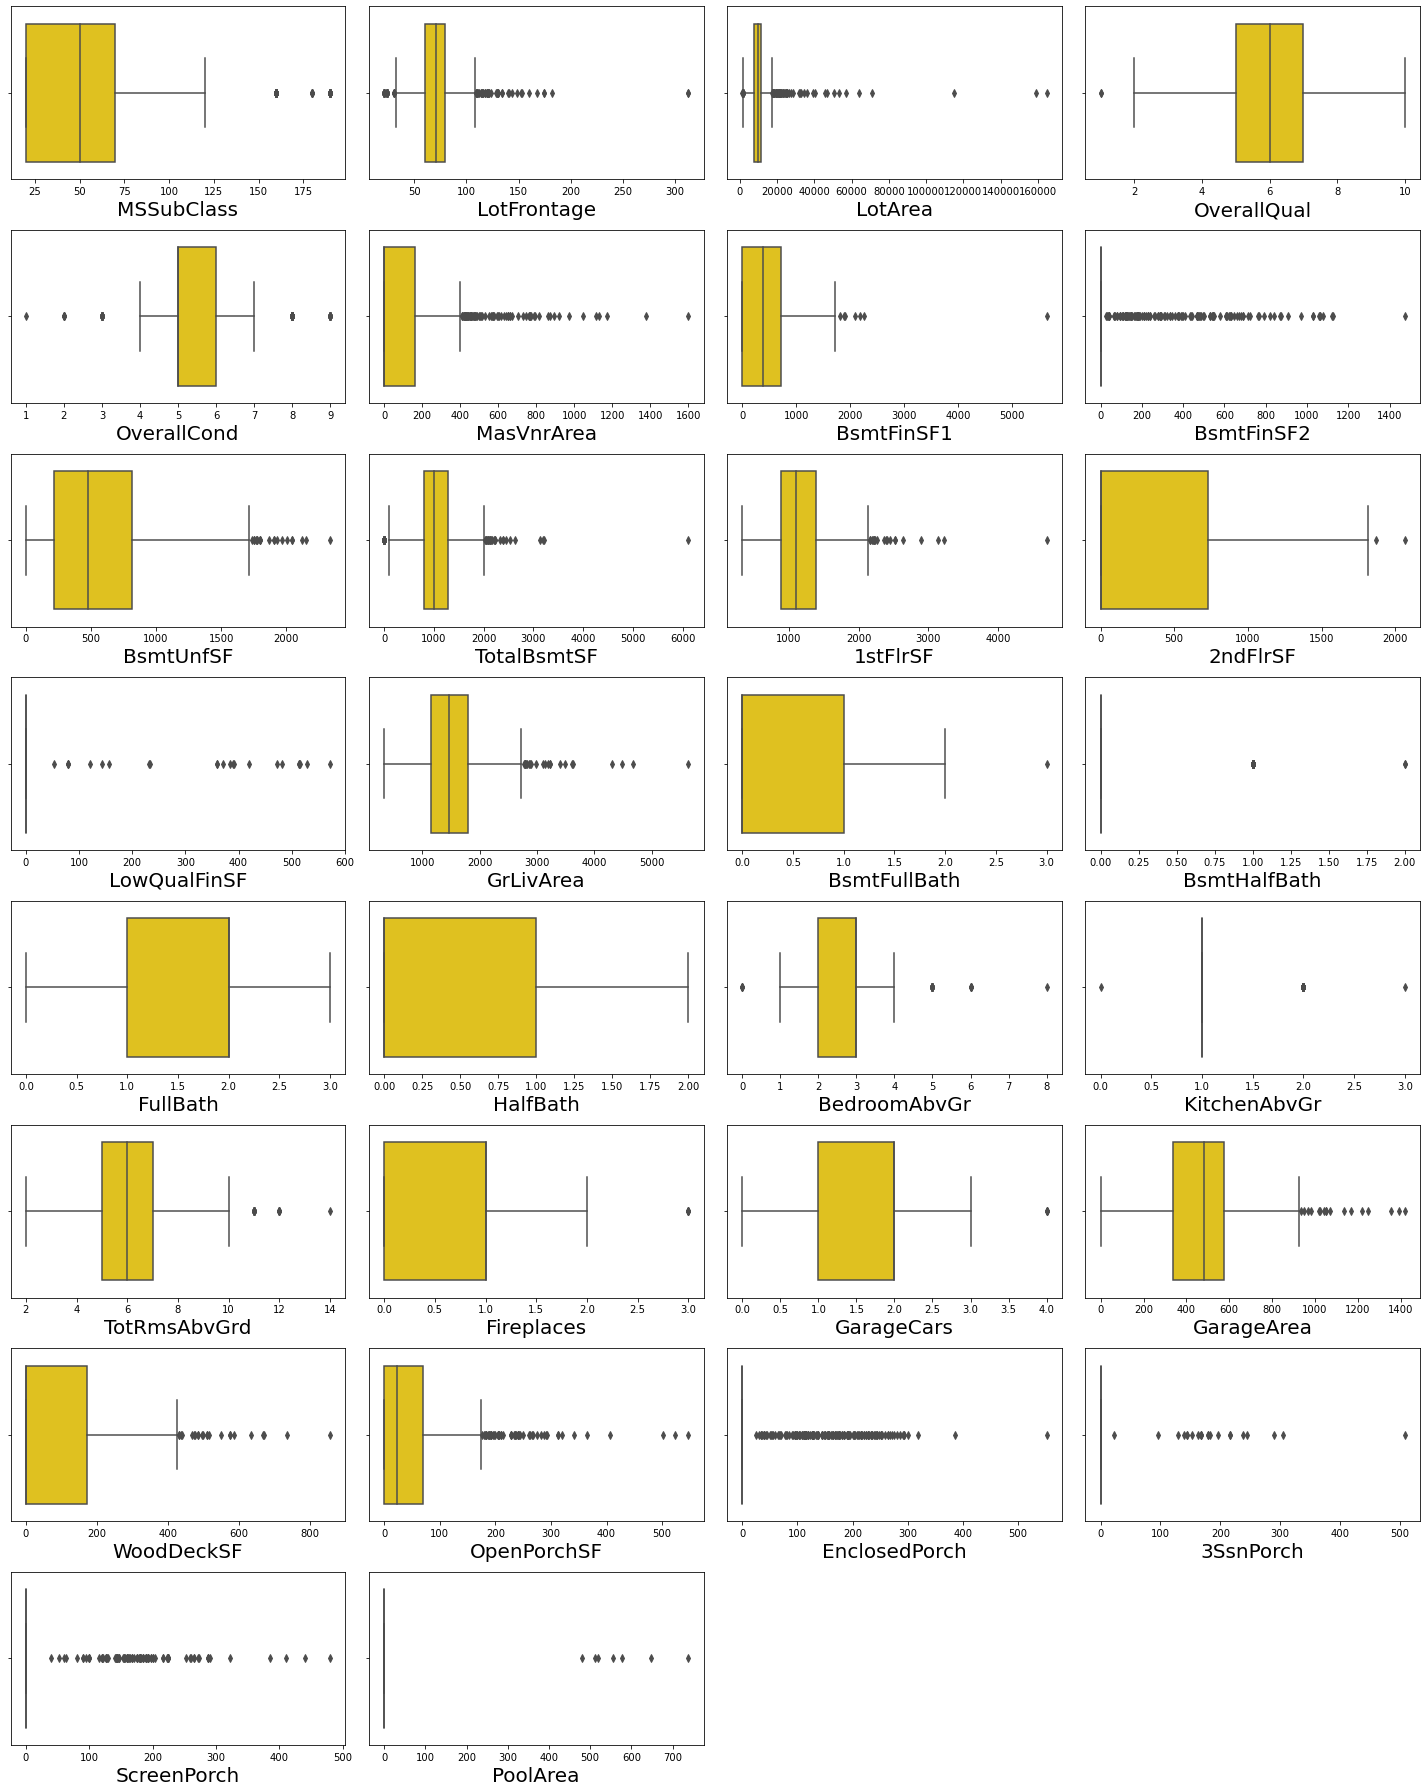

In [50]:
# Identifying the outliers using boxplot in train dataset

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

The columns with outliers in train dataset are

- MSSubClass

- LotFrontage

- LotArea

- OverallQual

- OverallCond

- MasVnrArea

- BsmtFinSF1

- BsmtUnfSF

- TotalBsmtSF

- 1stFlrSF

- 2ndFlrSF

- GrLivArea

- BsmtFullBath

- BsmtHalfBath

- BedroomAbvGr

- KitchenAbvGr

- TotRmsAbvGrd

- Fireplaces

- GarageCars

- GarageArea

- WoodDeckSF

- OpenPorchSF

- Year_SinceBuilt

- GarageAge

- SalePrice

Since SalePrice is my target i should not remove outliers from this column.And MSSubClass, OverallQual and OverallCond are seems to be categorical so let me not remove outliers in this columns

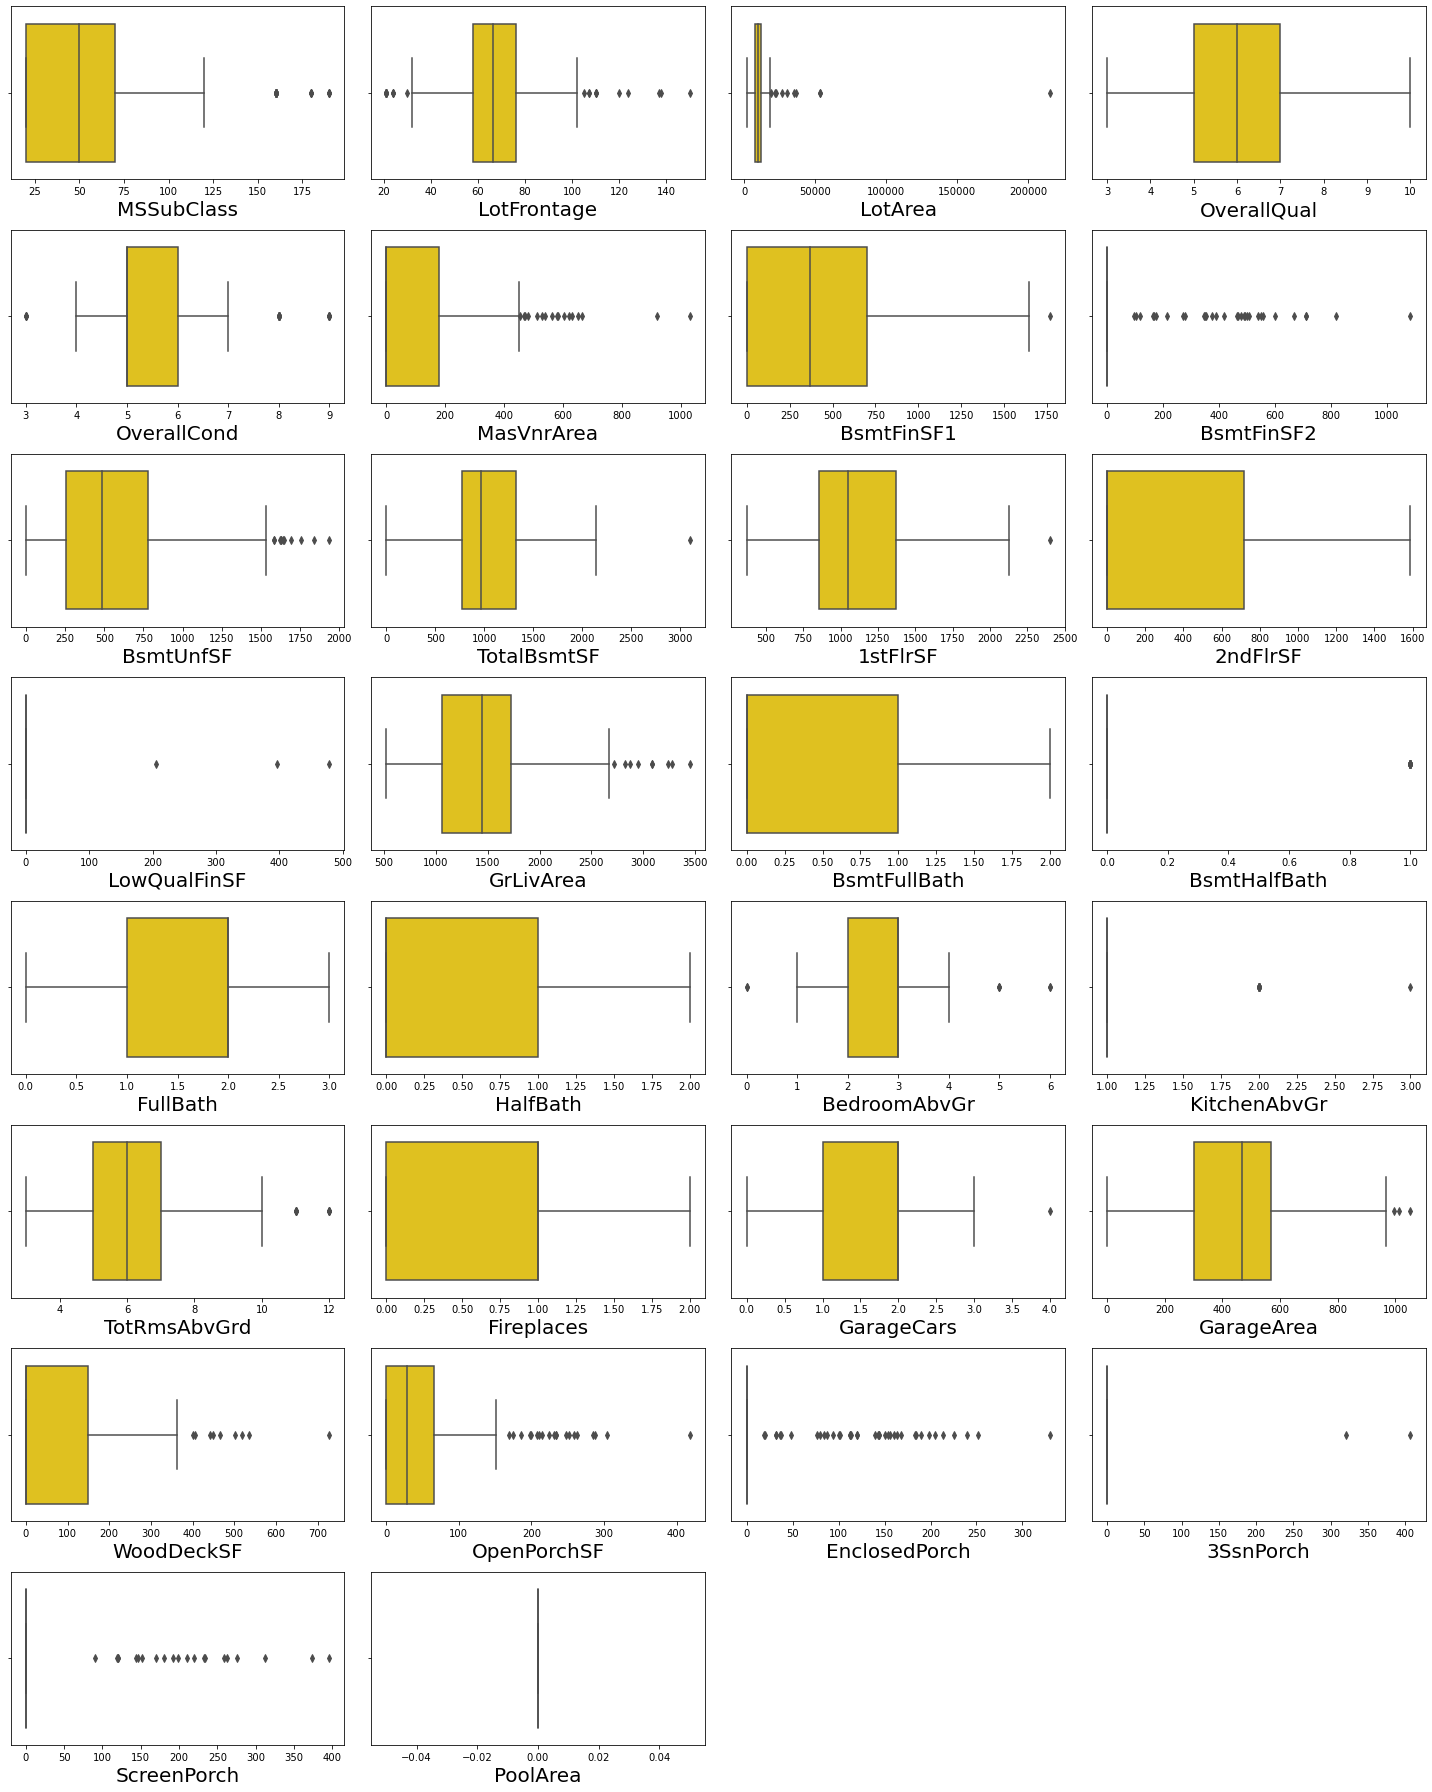

In [51]:
# Identifying the outliers using boxplot in test dataset

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns1:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(dff[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

The columns with outliers in test dataset are

- MSSubClass
- LotFrontage
- LotArea
- OverallCond
- MasVnrArea
- BsmtFinSF1
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- GrLivArea
- BsmtHalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- GarageCars
- GarageArea
- WoodDeckSF
- OpenPorchSF
- Year_SinceBuilt

MSSubClass and OverallCond are seems to be categorical so let me not remove outliers in this columns.

# Removing Outliers in train dataset:

# i) Zscore method:

In [52]:
#Features having outliers in train dataset
features=df[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt','GarageAge']]

Above are the list of columns with outliers in train dataset.

In [53]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL     70.98847     4928   Pave      IR1         Lvl   
1          20       RL     95.00000    15865   Pave      IR1         Lvl   
2          60       RL     92.00000     9920   Pave      IR1         Lvl   
3          20       RL    105.00000    11751   Pave      IR1         Lvl   
5          60       RL     58.00000    14054   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
5    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            6            5     Gable  CompShg     Plywood     Plywood   
1            8            6      Flat  Tar&Grv     Wd Sdng     Wd Sdng   
2            7            5     Gable  CompShg     MetalSd     MetalSd   
3            6            6       Hip  CompShg     Plywood     Plywood   
5            7            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       None         0.0        TA        TA     CBlock       Gd       TA   
1       None         0.0        Gd        Gd      PConc       TA       Gd   
2       None         0.0        Gd        TA      PConc       Gd       TA   
3    BrkFace       480.0        TA        TA     CBlock       Gd       TA   
5       None         0.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          ALQ         120          Unf           0        958   
1           Gd          ALQ         351          Rec         823       1043   
2           Av          GLQ         862          Unf           0        255   
3           No          BLQ         705          Unf           0       1139   
5           Av          Unf           0          Unf           0        879   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0         1078    GasA        TA          Y      SBrkr       958         0   
1         2217    GasA        Ex          Y      SBrkr      2217         0   
2         1117    GasA        Ex          Y      SBrkr      1127       886   
3         1844    GasA        Ex          Y      SBrkr      1844         0   
5          879    GasA        Ex          Y      SBrkr       879       984   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0        958             0             0         2         0   
1             0       2217             1             0         2         0   
2             0       2013             1             0         2         1   
3             0       1844             0             0         2         0   
5             0       1863             0             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             2             1          TA             5        Typ   
1             4             1          Gd             8        Typ   
2             3             1          TA             8        Typ   
3             3             1          TA             7        Typ   
5             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
0           1          TA     Attchd          RFn           2         440   
1           1          TA     Attchd          Unf           2         621   
2           1          TA     Attchd          Unf           2         455   
3           1  

I have removed the skewness using zscore method in train dataset.

In [54]:
#Checking shape of new train dataset
df_new.shape

(953, 75)

In my new train dataset i have 953 rows and 68 columns.

In [55]:
#Checking shape of old train dataset
df.shape

(1168, 75)

In [56]:
#Checking dataloss in zscore method of train dataset
Dataloss = (((1168-953)/1168)*100)
Dataloss

18.40753424657534

In Z-score method for trian dataset the data loss is more than 10% so let me have a look into IQR method to remove outliers.

# ii) IQR method:

In [57]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness of train dataset using IQR method

In [58]:
#Checking shape of new train dataset
df_1.shape

(780, 75)

In [59]:
#Checking shape of old train dataset
df.shape

(1168, 75)

In [60]:
#Checking dataloss in IQR method of train dataset
Dataloss = (((1168-780)/1168)*100)
Dataloss

33.21917808219178

In IQR method of train dataset the data loss is more than 10% so let me have a look into percentile method to remove outliers.

# iii) Percentile Method:

In [61]:
#Removing outliers using percentile method in train dataset
for col in features:
    if df[col].dtypes != 'object':
        percentile = df[col].quantile([0.01,0.98]).values
        df[col][df[col]<=percentile[0]]=percentile[0]
        df[col][df[col]>=percentile[1]]=percentile[1]

I have successfully removed outliers in train dataset using percentile method.

# Removing Outliers in test dataset:

# i) Zscore method:

In [62]:
#Features having outliers in test dataset
features1=dff[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt']]

In [63]:
from scipy.stats import zscore
z=np.abs(zscore(features1))
dff_new=dff[(z<3).all(axis=1)]
dff_new.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RL    86.000000    14157   Pave      IR1         HLS   
1         120       RL    66.425101     5814   Pave      IR1         Lvl   
2          20       RL    66.425101    11838   Pave      Reg         Lvl   
3          70       RL    75.000000    12000   Pave      Reg         Bnk   
4          60       RL    86.000000    14598   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Corner       Gtl      StoneBr       Norm       Norm     1Fam     1Story   
1   CulDSac       Gtl      StoneBr       Norm       Norm   TwnhsE     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     1Story   
3    Inside       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4   CulDSac       Gtl      Somerst      Feedr       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            9            5       Hip  CompShg     VinylSd     VinylSd   
1            8            5     Gable  CompShg     HdBoard     HdBoard   
2            8            5       Hip  CompShg     VinylSd     VinylSd   
3            7            7     Gable  CompShg     MetalSd     MetalSd   
4            6            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0      Stone       200.0        Gd        TA      PConc       Ex       TA   
1       None         0.0        Gd        TA     CBlock       Gd       TA   
2       None         0.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     CBlock       TA       TA   
4      Stone        74.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           Gd          GLQ        1249          Unf           0        673   
1           Av          GLQ        1036          Unf           0        184   
2           Av          Unf           0          Unf           0       1753   
3           No          Rec         275          Unf           0        429   
4           Mn          Unf           0          Unf           0        894   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0         1922    GasA        Ex          Y      SBrkr      1922         0   
1         1220    GasA        Gd          Y      SBrkr      1360         0   
2         1753    GasA        Ex          Y      SBrkr      1788         0   
3          704    GasA        Ex          Y      SBrkr       860       704   
4          894    GasA        Ex          Y      SBrkr       894      1039   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1922             1             0         2         0   
1             0       1360             1             0         1         0   
2             0       1788             0             0         2         0   
3             0       1564             0             0         1         1   
4             0       1933             0             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             1             1          Gd             4        Typ   
2             3             1          Ex             7        Typ   
3             3             1          Fa             7        Typ   
4             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
0           1          Gd     Attchd          Fin           3         676   
1           1          Ex     Attchd          RFn           2         565   
2           1          TA     Attchd          RFn           2         522   
3           1  

In [64]:
#Checking shape of new test dataset
dff_new.shape

(235, 74)

In [65]:
#Checking shape of old test dataset
dff.shape

(292, 74)

In [66]:
#Checking dataloss in zscore method of test dataset
Dataloss1 = (((292-235)/292)*100)
Dataloss1

19.52054794520548

In [67]:
# 1st quantile
Q1=features1.quantile(0.25)

# 3rd quantile
Q3=features1.quantile(0.75)

# IQR
IQR=Q3 - Q1

dff_1=dff[~((dff < (Q1 - 1.5 * IQR)) |(dff > (Q3 + 1.5 * IQR))).any(axis=1)]

In [68]:
#Checking shape of new test dataset
dff_1.shape

(185, 74)

In my new test dataset i have 185 rows and 67 columns.

In [69]:
#Checking shape of old test dataset
dff.shape

(292, 74)

In my old test dataset i was having 292 rows and 67 columns.

In [70]:
#Checking dataloss in IQR method of test dataset
Dataloss1 = (((292-185)/292)*100)
Dataloss1

36.64383561643836

In IQR method of test dataset the data loss is more than 10% so let me have a look into percentile method to remove outliers.

In [71]:
#Removing outliers using percentile method in test dataset
for col1 in features1:
    if dff[col1].dtypes != 'object':
        percentile = dff[col1].quantile([0.01,0.98]).values
        dff[col][dff[col]<=percentile[0]]=percentile[0]
        dff[col][dff[col]>=percentile[1]]=percentile[1]

I have successfully removed outliers in test dataset using percentile method

# Checking for skewness:

In [72]:
#Checking for skewness of train dataset
df.skew()

MSSubClass               1.422019
LotFrontage              0.188060
LotArea                  1.191912
OverallQual              0.175082
OverallCond              0.580714
MasVnrArea               1.873138
BsmtFinSF1               0.639523
BsmtFinSF2               4.365829
BsmtUnfSF                0.777624
TotalBsmtSF              0.166773
1stFlrSF                 0.645842
2ndFlrSF                 0.717390
LowQualFinSF             8.666142
GrLivArea                0.592755
BsmtFullBath             0.355224
BsmtHalfBath             3.954345
FullBath                 0.057809
HalfBath                 0.656492
BedroomAbvGr            -0.145762
KitchenAbvGr             4.374289
TotRmsAbvGrd             0.443931
Fireplaces               0.552677
GarageCars              -0.434745
GarageArea              -0.135675
WoodDeckSF               1.053617
OpenPorchSF              1.513678
EnclosedPorch            3.043610
3SsnPorch                9.770611
ScreenPorch              4.105741
PoolArea      

The columns with skewness in train dataset

- MSSubClass
- LotArea
- OverallCond
- MasVnrArea
- BsmtFinSF1
- BsmtUnfSF
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- BsmtHalfBath
- HalfBath
- KitchenAbvGr
- Fireplaces
- WoodDeckSF
- OpenPorchSF
- SalePrice
- GarageAge

But as SalePrice is my target i should not remove skewness in this column.And MSSubClass and OverallCond are seems to be categorical so let me not remove outliers in this columns

In [73]:
#Checking for skewness of test dataset
dff.skew()

MSSubClass               1.358597
LotFrontage              0.466813
LotArea                 12.781805
OverallQual              0.397312
OverallCond              1.209714
MasVnrArea               1.976804
BsmtFinSF1               0.739790
BsmtFinSF2               3.698543
BsmtUnfSF                0.960708
TotalBsmtSF              0.519257
1stFlrSF                 0.692047
2ndFlrSF                 0.765511
LowQualFinSF            10.929928
GrLivArea                1.010586
BsmtFullBath             0.463685
BsmtHalfBath             3.544994
FullBath                -0.049800
HalfBath                 0.758892
BedroomAbvGr             0.075315
KitchenAbvGr             4.849432
TotRmsAbvGrd             0.805535
Fireplaces               0.540164
GarageCars              -0.280324
GarageArea               0.133547
WoodDeckSF               1.708221
OpenPorchSF              2.185030
EnclosedPorch            3.177046
3SsnPorch               12.277476
ScreenPorch              4.182351
PoolArea      

The columns with skewness in test dataset

- MSSubClass
- LotArea
- OverallCond
- MasVnrArea
- BsmtFinSF1
- BsmtUnfSF
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- BsmtHalfBath
- HalfBath
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- WoodDeckSF
- OpenPorchSF
- Year_SinceBuilt
- Year_SinceRemodAdded
- MSSubClass and OverallCond are seems to be categorical so let me not remove outliers in this columns.

In GarageAge skewness is zero which means all the entries in this column are same so let me drop it in test dataset. Since i'm dropping in test i should drop in train also.

In [74]:
#Dropping unnecessary column in train dataset
df = df.drop(["GarageAge"],axis=1)

In [75]:
#Dropping unnecessary column in test dataset
dff = dff.drop(["GarageAge"],axis=1)

# Removing skewness using yeo-johnson method for train dataset:

In [76]:
#Creating a list of skewed features in train dataset
fea=['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','HalfBath','KitchenAbvGr','Fireplaces','WoodDeckSF','OpenPorchSF','SalePrice']

In [77]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [78]:
df[fea] = scaler.fit_transform(df[fea].values)

In [79]:
#Checking skewness again in train dataset
df[fea].skew()

LotArea         0.077861
MasVnrArea      0.415092
BsmtFinSF1     -0.418554
BsmtUnfSF      -0.304290
1stFlrSF       -0.000731
2ndFlrSF        0.279883
GrLivArea      -0.005974
BsmtHalfBath    3.954345
HalfBath        0.498003
KitchenAbvGr    0.000000
Fireplaces      0.076595
WoodDeckSF      0.110387
OpenPorchSF    -0.010092
SalePrice      -0.006010
dtype: float64

After removing skewness i'm getting skewness of KitchenAbvGr as 00000 which means this column has a unique single entry. So this column will create problem for us let me drop this column.

In [80]:
#Dropping unnecessary column
df = df.drop(["KitchenAbvGr"],axis=1)

# Removing skewness using yeo-johnson method for test dataset:

In [81]:
#Creating a list of skewed features in test dataset
fea1=['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','HalfBath','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','Year_SinceBuilt','Year_SinceRemodAdded']

In [82]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [83]:
df[fea1] = scaler.fit_transform(df[fea1].values)

Got removed from skewness.

In [84]:
#Checking skewness again in test dataset
dff[fea1].skew()

LotArea                 12.781805
MasVnrArea               1.976804
BsmtFinSF1               0.739790
BsmtUnfSF                0.960708
1stFlrSF                 0.692047
2ndFlrSF                 0.765511
GrLivArea                1.010586
BsmtHalfBath             3.544994
HalfBath                 0.758892
TotRmsAbvGrd             0.805535
Fireplaces               0.540164
WoodDeckSF               1.708221
OpenPorchSF              2.185030
Year_SinceBuilt          0.755233
Year_SinceRemodAdded     0.535600
dtype: float64

After removing skewness i'm getting skewness of KitchenAbvGr as 4.2536.Since i have removed this column in train dataset to get same allingment let me drop in test also.

In [85]:
#Dropping unnecessary column
dff = dff.drop(["KitchenAbvGr"],axis=1)

# Ordinal Encoding:

In [86]:
#Replacing ratings with suitable numbers in required columns in train dataset
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column:
    df[i] = df[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

In [87]:
#Replacing ratings with suitable numbers in required columns in test dataset
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column:
    dff[i] = dff[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

I have replaced all rating entries with required numbers.

In [88]:
#Ordinal encoding for train dataset
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [89]:
#Ordinal encoding for test dataset
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in dff.columns:
    if dff[i].dtypes=='object':
        dff[i]=OE.fit_transform(dff[i].values.reshape(-1,1))


In [90]:
#Correlation of train dataset
cor=df.corr()
cor

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass              1.000000  0.007478    -0.391424 -0.404514 -0.035981   
MSZoning                0.007478  1.000000    -0.084834 -0.059497  0.140215   
LotFrontage            -0.391424 -0.084834     1.000000  0.598263 -0.044573   
LotArea                -0.404514 -0.059497     0.598263  1.000000 -0.072131   
Street                 -0.035981  0.140215    -0.044573 -0.072131  1.000000   
LotShape                0.104485  0.053655    -0.157341 -0.287130 -0.012941   
LandContour            -0.021387  0.001175    -0.016620 -0.073699  0.105226   
LotConfig               0.076880 -0.027246    -0.201691 -0.198884  0.000153   
LandSlope              -0.014930 -0.023952     0.023253  0.174293 -0.141572   
Neighborhood            0.013918 -0.251833     0.091671  0.076420  0.001420   
Condition1             -0.042474 -0.025651    -0.022579  0.069277  0.002189   
Condition2             -0.044319  0.031959     0.011970  0.056341  0.001406   
BldgType                0.731815 -0.024776    -0.467073 -0.528158 -0.013606   
HouseStyle              0.381585 -0.110991     0.057902  0.004752  0.016793   
OverallQual             0.070462 -0.134037     0.230687  0.189926  0.057140   
OverallCond            -0.056978  0.189553    -0.051887  0.010419  0.031082   
RoofStyle              -0.100641  0.000913     0.168101  0.120031 -0.006875   
RoofMatl               -0.032214  0.009719     0.063294  0.218490  0.007889   
Exterior1st            -0.090178 -0.012037     0.079942  0.079623  0.012482   
Exterior2nd            -0.120022  0.005548     0.108934  0.096323  0.014618   
MasVnrType             -0.013252 -0.033521    -0.066054 -0.019975  0.000822   
MasVnrArea              0.023116 -0.037341     0.159916  0.070534  0.019397   
ExterQual               0.032564 -0.160447     0.158712  0.097437  0.091807   
ExterCond              -0.051385  0.097907    -0.001004  0.070139 -0.028096   
Foundation              0.053951 -0.244844     0.090652  0.009380  0.032701   
BsmtQual                0.070818 -0.206193     0.163680  0.115346  0.027107   
BsmtCond               -0.009496 -0.041842     0.047333  0.047177  0.002199   
BsmtExposure           -0.068192  0.037414    -0.121117 -0.144184  0.065253   
BsmtFinType1            0.017515  0.021518    -0.028977 -0.043101 -0.006420   
BsmtFinSF1             -0.045552 -0.037742     0.105209  0.145436  0.002821   
BsmtFinType2            0.040573 -0.031322    -0.015941 -0.073763  0.045208   
BsmtFinSF2             -0.062403  0.027055     0.011048  0.089430  0.003550   
BsmtUnfSF              -0.134567 -0.033423     0.134432  0.057487  0.029603   
TotalBsmtSF            -0.229300 -0.065060     0.318263  0.332243  0.016841   
Heating                 0.047734  0.051188    -0.036713 -0.020813  0.006981   
HeatingQC               0.005480 -0.149446     0.084699  0.047297  0.038560   
CentralAir             -0.113883 -0.015887     0.087970  0.073440  0.043024   
Electrical              0.045533 -0.079205     0.073880  0.053135  0.038720   
1stFlrSF               -0.265289 -0.037650     0.395509  0.453550  0.009855   
2ndFlrSF                0.355989 -0.014177    -0.041680  0.004658  0.024640   
LowQualFinSF            0.053737  0.012098    -0.004546  0.004767  0.007352   
GrLivArea               0.096288 -0.086578     0.318541  0.397866  0.052679   
BsmtFullBath           -0.011290 -0.009900     0.070859  0.108391 -0.010398   
BsmtHalfBath           -0.000125  0.006809     0.011408  0.043135  0.013997   
FullBath                0.140807 -0.188837     0.180823  0.186797  0.033208   
HalfBath                0.165331 -0.125476     0.049698  0.060784  0.045903   
BedroomAbvGr           -0.037908 -0.000610     0.278173  0.298929  0.028722   
KitchenQual             0.019462 -0.133170     0.158665  0.126523  0.068306   
TotRmsAbvGrd            0.032637 -0.024263     0.327492  0.371746  0.041342   
Functional              0.022913 -0.091684     0.037977 -0.024442 -0.015

In [91]:
#Correlation of test dataset
cor=dff.corr()
cor

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass              1.000000  0.266517    -0.454786 -0.186654  0.004588   
MSZoning                0.266517  1.000000    -0.335754 -0.117968 -0.063162   
LotFrontage            -0.454786 -0.335754     1.000000  0.370091 -0.056531   
LotArea                -0.186654 -0.117968     0.370091  1.000000 -0.069626   
Street                  0.004588 -0.063162    -0.056531 -0.069626  1.000000   
LotShape                0.176681  0.167716    -0.147720 -0.110574 -0.002444   
LandContour             0.068736 -0.099137    -0.086163 -0.131482  0.153613   
LotConfig               0.071784  0.055261    -0.124470 -0.042599  0.058229   
LandSlope              -0.073979 -0.035312     0.176406  0.620079 -0.324146   
Neighborhood           -0.081962 -0.204984     0.184817  0.137189 -0.045972   
Condition1              0.042599 -0.059909     0.064350  0.010799 -0.246714   
Condition2             -0.036770  0.105995    -0.018887 -0.019035  0.004868   
BldgType                0.798007  0.230251    -0.436593 -0.190456 -0.028820   
HouseStyle              0.455233 -0.068366    -0.080950 -0.015258  0.043073   
OverallQual            -0.116077 -0.276394     0.254760  0.109161  0.066173   
OverallCond            -0.068113  0.191126    -0.096571 -0.071113  0.077702   
RoofStyle              -0.183492 -0.031210     0.199222  0.182766 -0.054925   
RoofMatl               -0.019367 -0.022604     0.077308  0.004290  0.006540   
Exterior1st            -0.103303 -0.028611     0.018168 -0.124700 -0.021532   
Exterior2nd            -0.202425 -0.028994     0.035881 -0.101138 -0.019729   
MasVnrType             -0.092343  0.010358     0.055159 -0.016483  0.036783   
MasVnrArea              0.002757 -0.107398     0.136119  0.062943 -0.001823   
ExterQual              -0.047717 -0.327079     0.185375  0.061311  0.128016   
ExterCond              -0.120495  0.065494    -0.072894 -0.020726  0.024868   
Foundation              0.072808 -0.195382     0.130965  0.013464  0.043091   
BsmtQual                0.099330 -0.219848     0.162885  0.080307  0.009123   
BsmtCond                0.016528 -0.139784     0.043670  0.007538  0.003768   
BsmtExposure           -0.049358  0.050552    -0.114149 -0.162388  0.099047   
BsmtFinType1            0.003453  0.038716    -0.007482 -0.087270 -0.037657   
BsmtFinSF1             -0.142908 -0.153966     0.152566  0.209632 -0.037222   
BsmtFinType2            0.043449 -0.015825    -0.115149 -0.030670  0.110019   
BsmtFinSF2             -0.079328  0.012808     0.245209  0.277855 -0.169054   
BsmtUnfSF              -0.169129 -0.123688     0.161516 -0.029717  0.070999   
TotalBsmtSF            -0.336822 -0.270929     0.398795  0.283111 -0.029632   
Heating                 0.049709  0.094397     0.011852  0.179646  0.011782   
HeatingQC              -0.116916 -0.225763     0.098609 -0.038435  0.060962   
CentralAir             -0.053192 -0.235065     0.031703  0.049270  0.156680   
Electrical              0.075568 -0.035888     0.020348  0.028097 -0.025961   
1stFlrSF               -0.350270 -0.212694     0.463473  0.286714 -0.013672   
2ndFlrSF                0.338926 -0.030786    -0.014547  0.030128  0.066596   
LowQualFinSF            0.012343  0.010704     0.202729  0.030371  0.008058   
GrLivArea               0.030615 -0.176389     0.333808  0.231721  0.045793   
BsmtFullBath           -0.000676 -0.084559     0.085464  0.212162 -0.094062   
BsmtHalfBath           -0.041577 -0.017534    -0.044632  0.020883  0.021908   
FullBath                0.095903 -0.236326     0.227718  0.141118  0.087362   
HalfBath                0.213601 -0.179885     0.036555  0.034980 -0.023607   
BedroomAbvGr           -0.061750 -0.104881     0.227534  0.134990  0.030347   
KitchenQual            -0.134592 -0.266916     0.181377  0.039356  0.058313   
TotRmsAbvGrd            0.002973 -0.123578     0.328972  0.211624  0.068251   
Functional             -0.075457 -0.131738    -0.002318  0.015773 -0.018

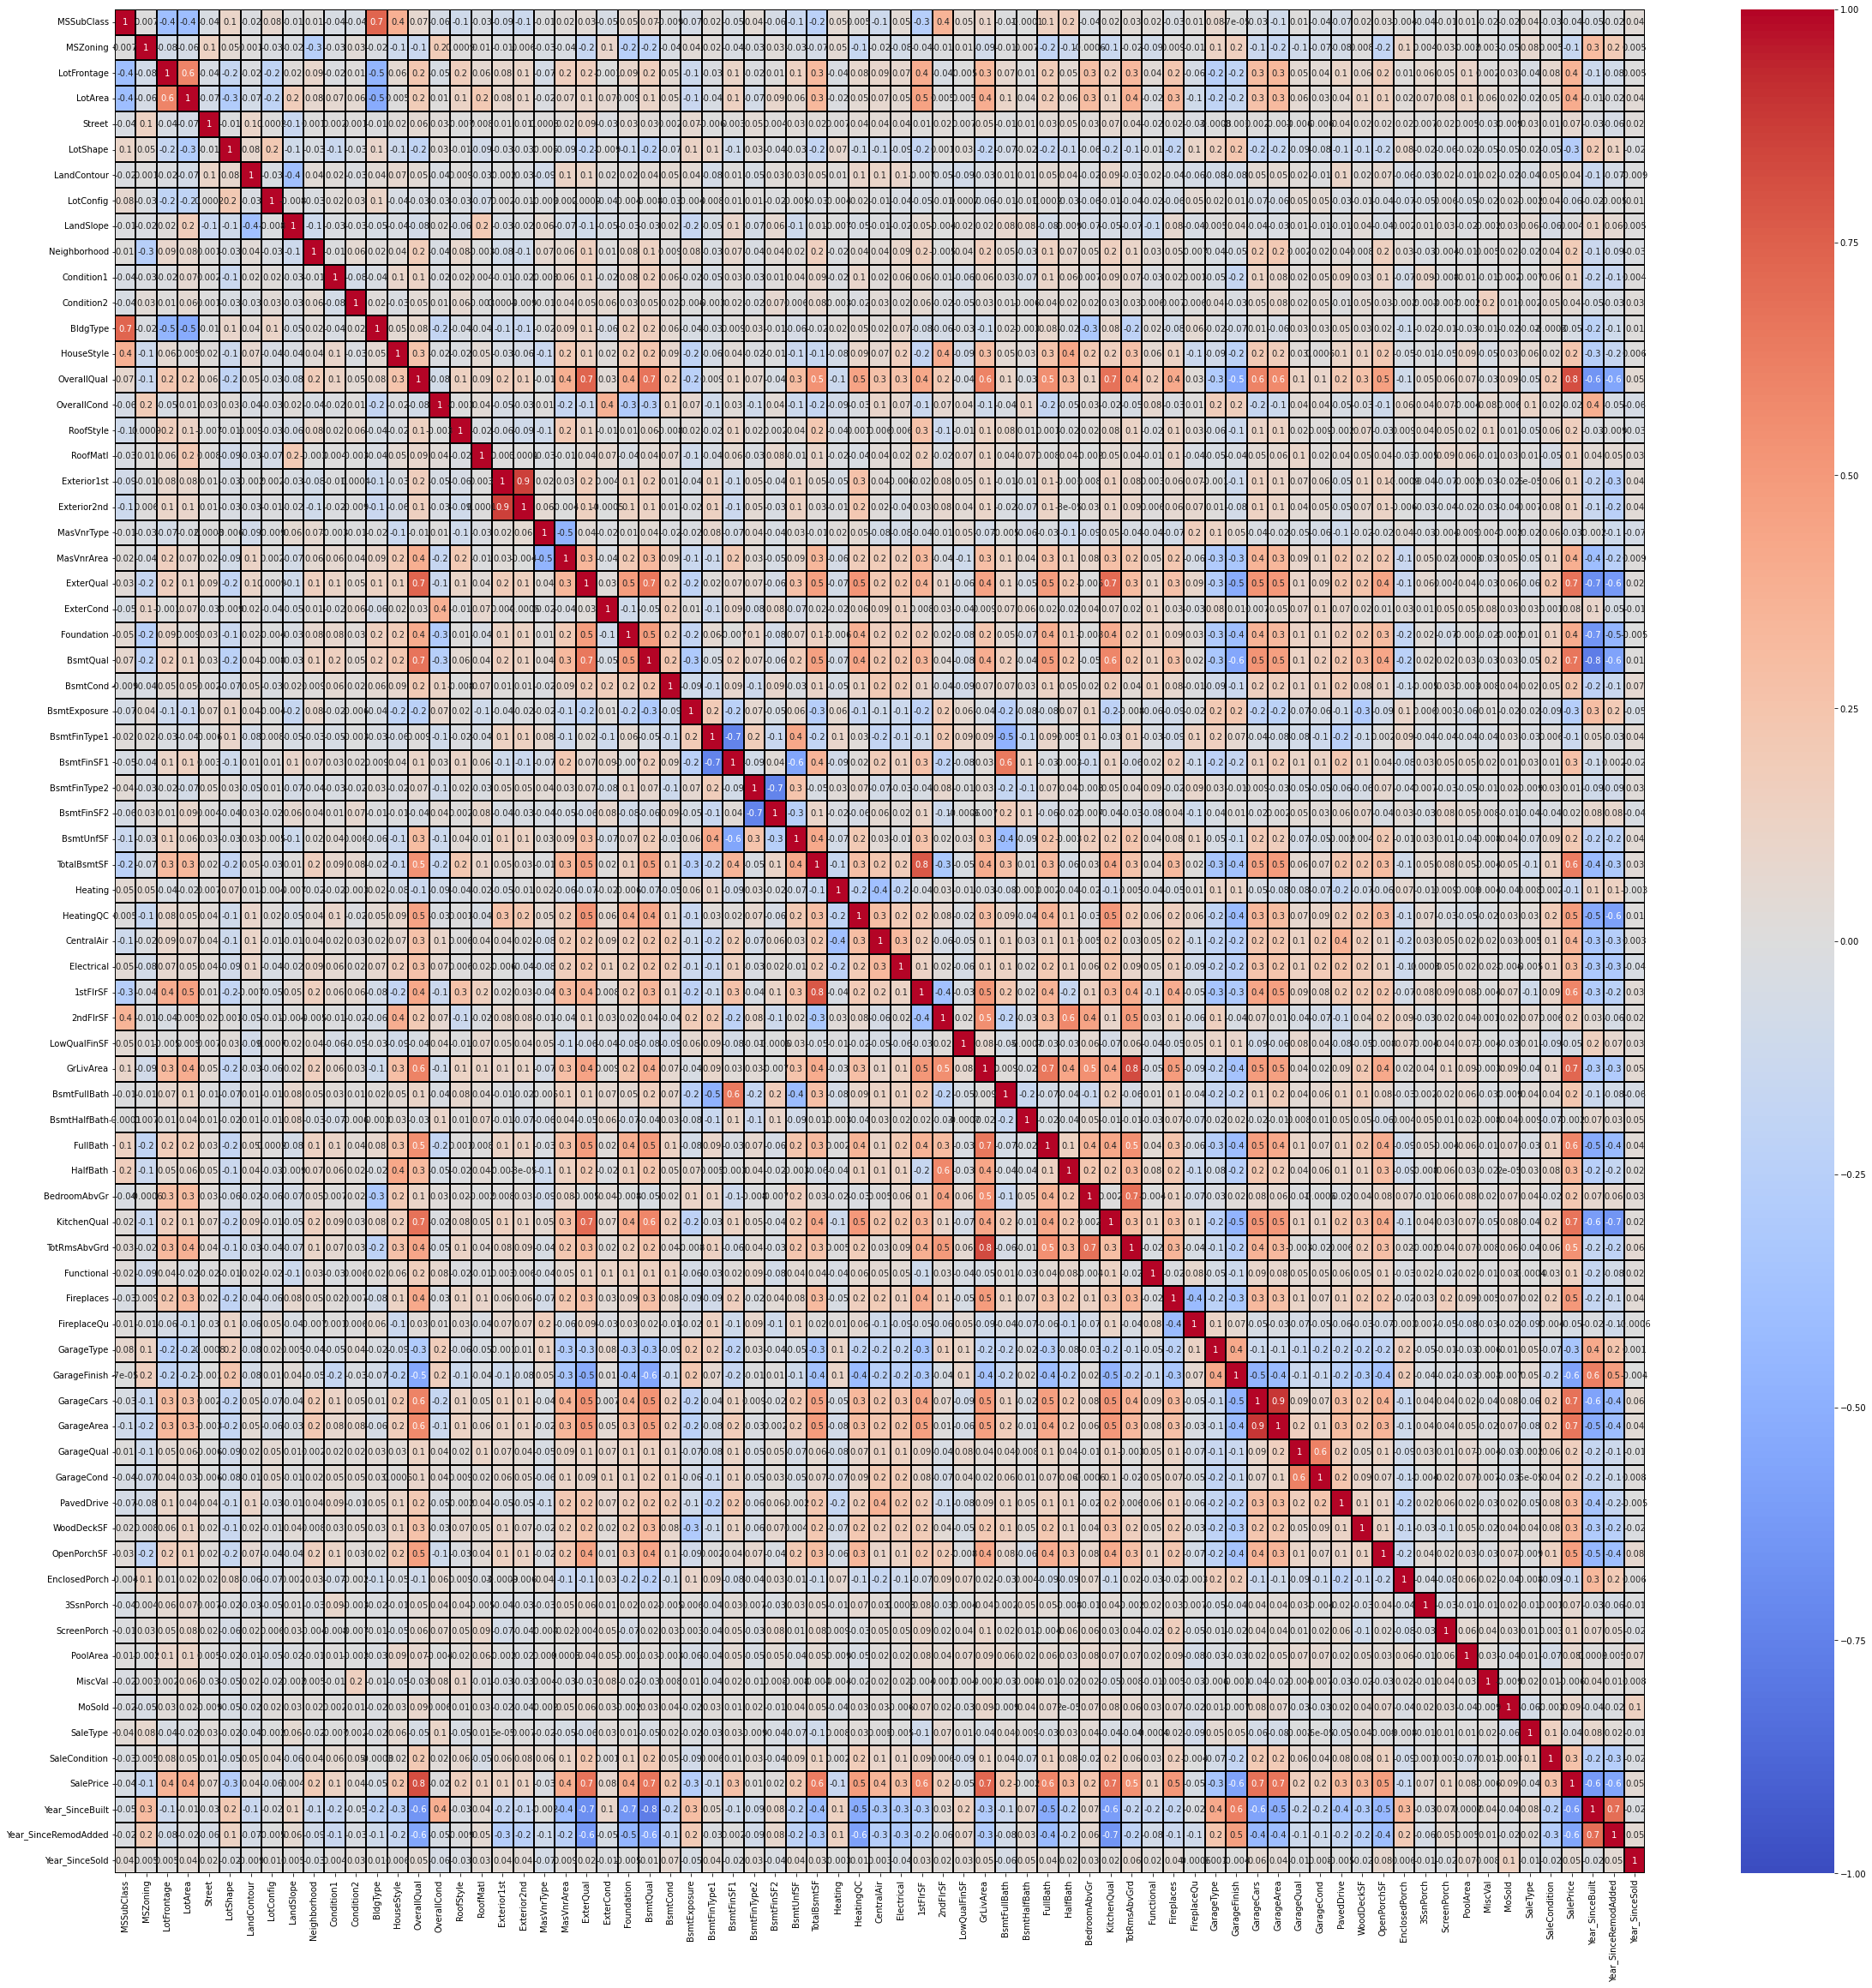

In [92]:
# Visualizing the correlation matrix by plotting heat map for train dataset.
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

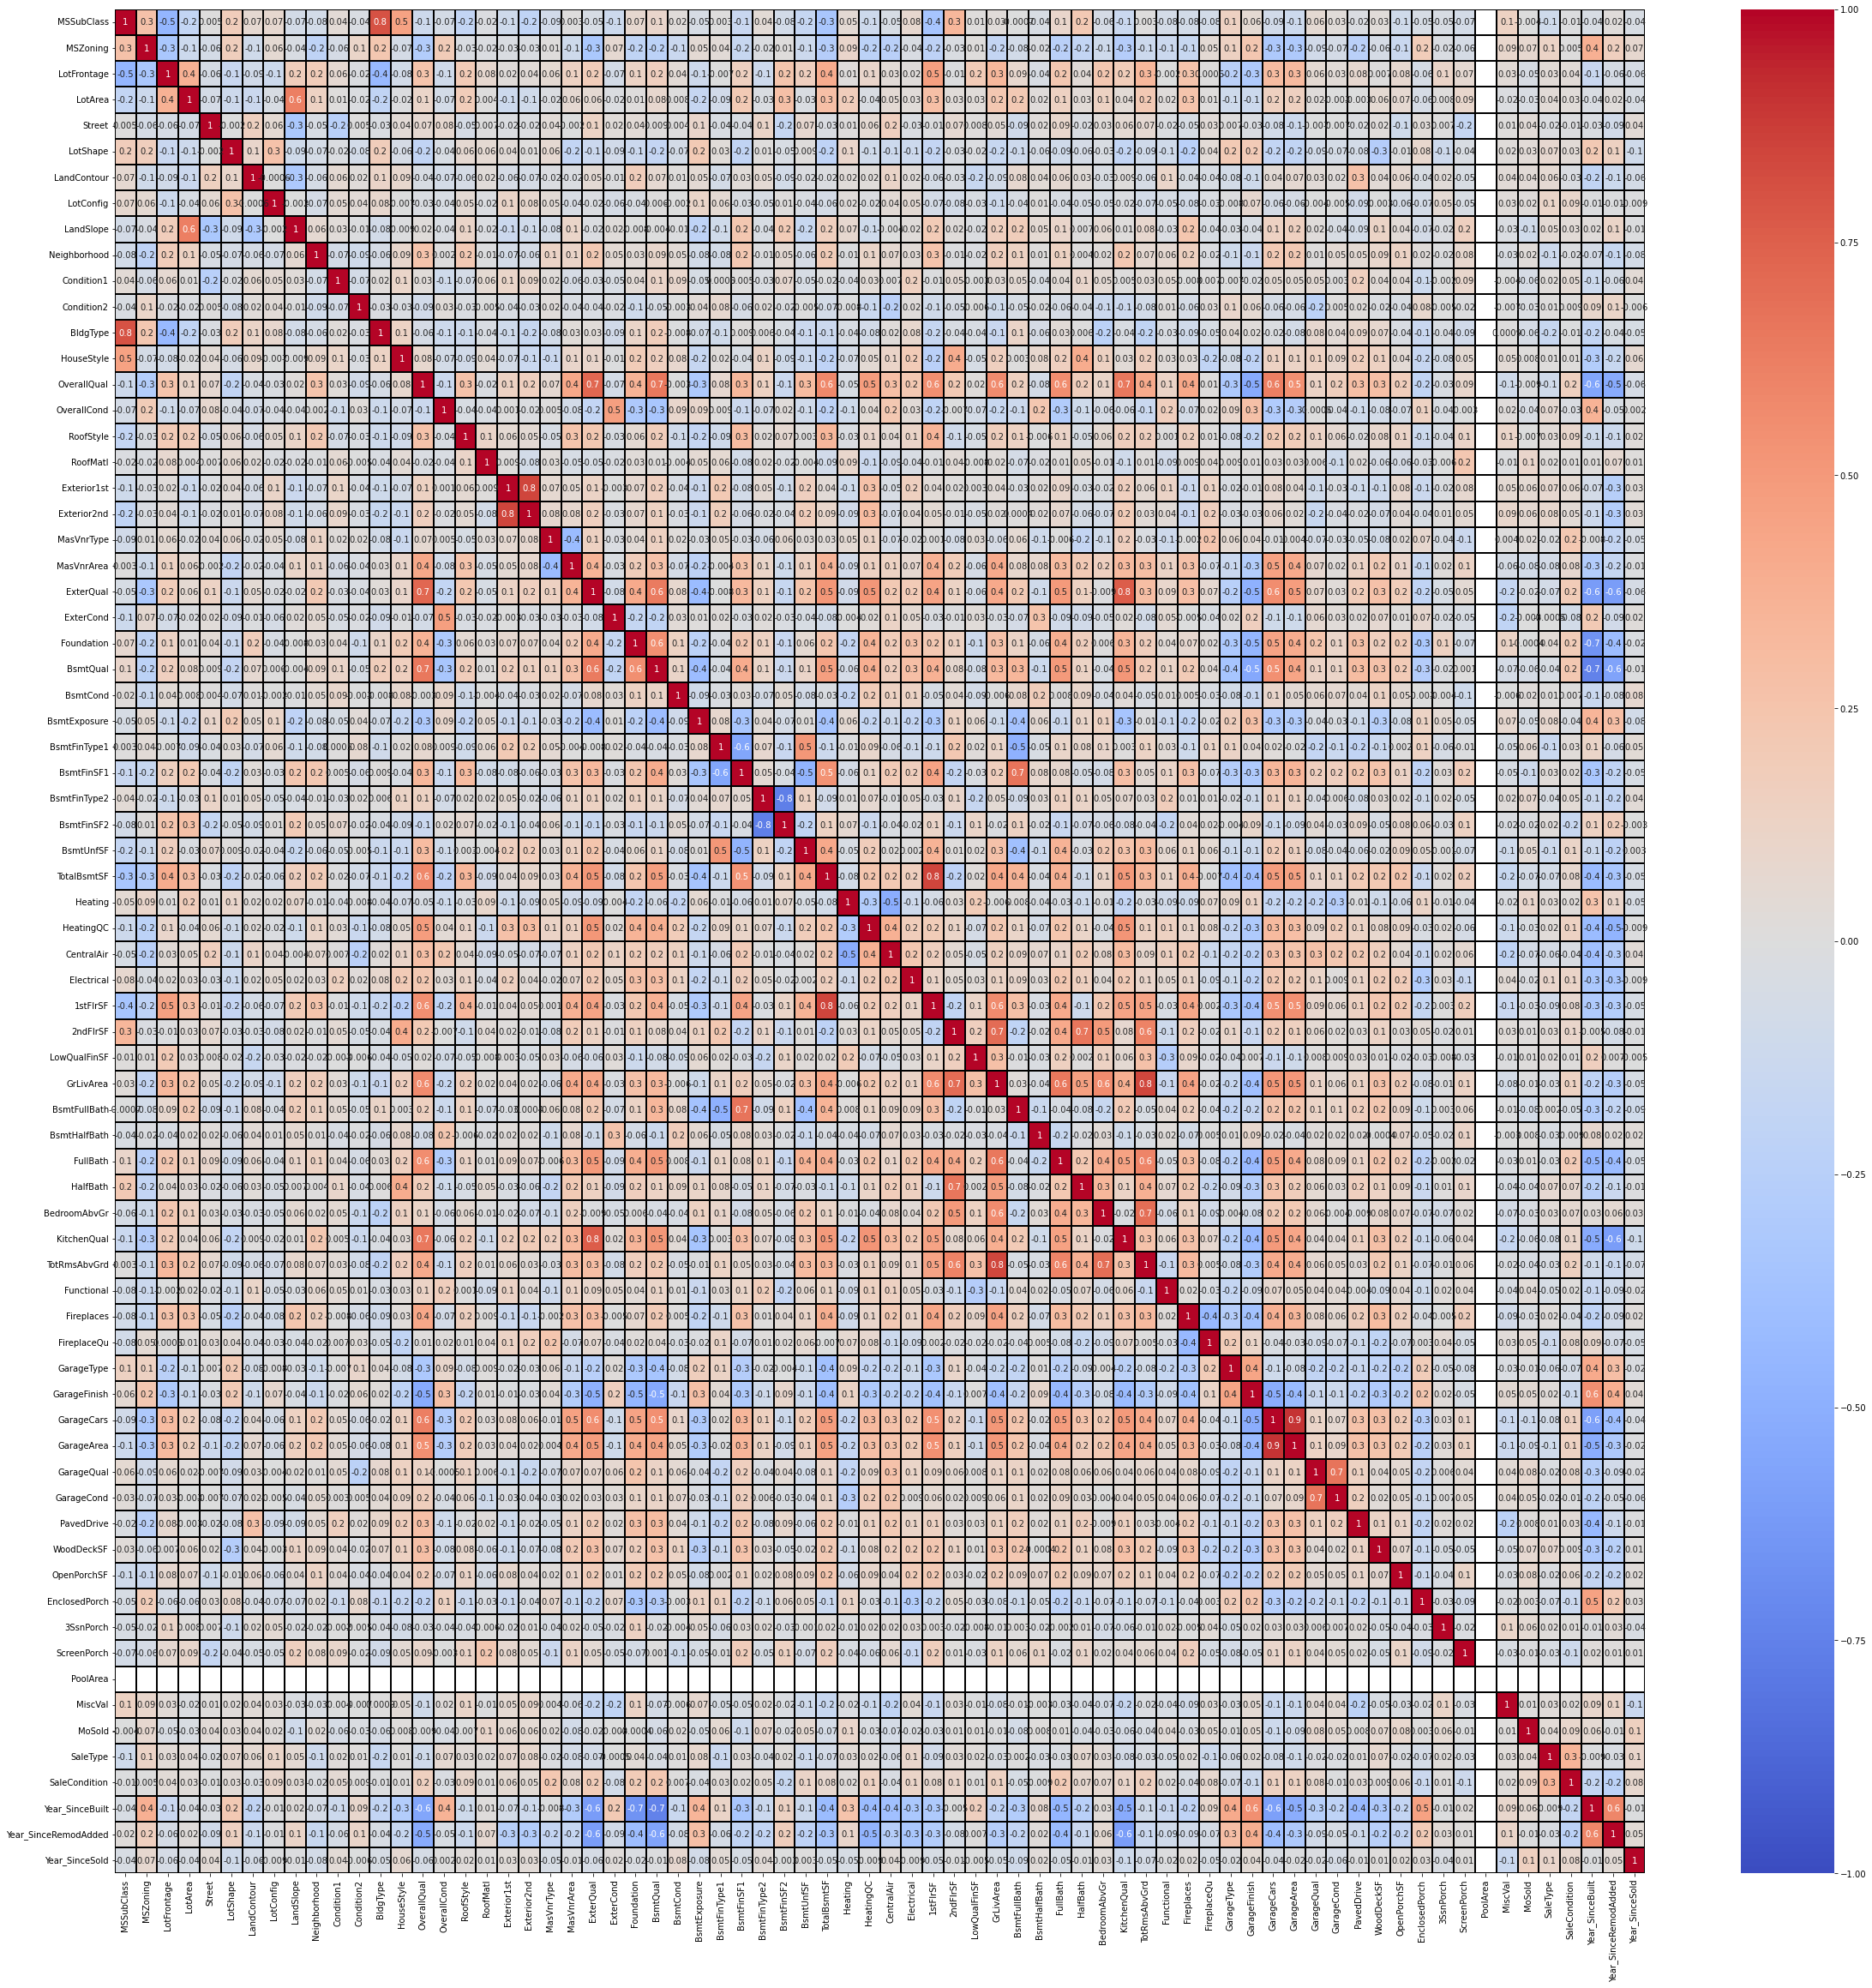

In [93]:
# Visualizing the correlation matrix by plotting heat map for test dataset.
plt.figure(figsize=(40,40))
sns.heatmap(dff.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

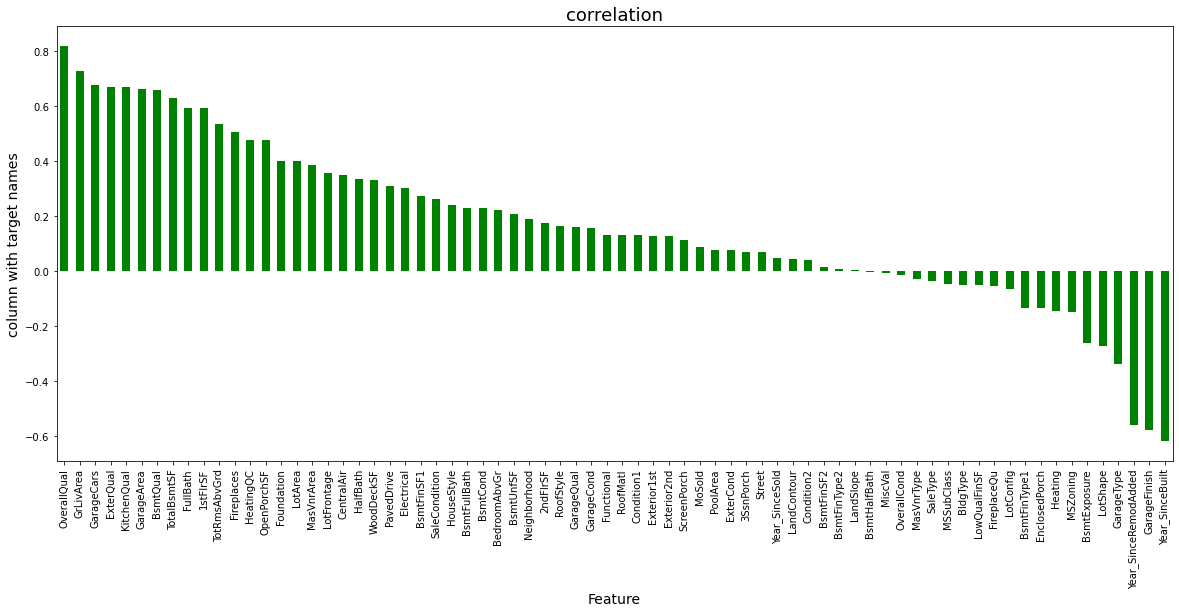

In [94]:
plt.figure(figsize=(20,8))
df.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Separating features and label in train dataset:

In [95]:
x = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

I have separated my target and independent columns.

# Scaling the train data using standard scaler:

In [96]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

I have scaled my train data using standard scaler.

In [97]:
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    1.508301 -0.021646     0.039092 -1.311302  0.058621 -1.373107   
1   -0.877042 -0.021646     1.321126  1.350999  0.058621 -1.373107   
2    0.077095 -0.021646     1.160948  0.118851  0.058621 -1.373107   
3   -0.877042 -0.021646     1.855050  0.534813  0.058621 -1.373107   
4   -0.877042 -0.021646     0.039092  1.489919  0.058621 -1.373107   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0     0.318473   0.606420  -0.226126      0.142224   -0.037339   -0.023979   
1     0.318473   0.606420   3.295414     -0.024227   -0.037339   -0.023979   
2     0.318473  -1.220661  -0.226126      0.475125   -0.037339   -0.023979   
3     0.318473   0.606420  -0.226126      0.308675   -0.037339   -0.023979   
4     0.318473  -0.611634  -0.226126      0.308675   -0.037339   -0.023979   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0  2.985495   -0.549930    -0.075169    -0.530217  -0.483544 -0.134573   
1 -0.403288   -0.549930     1.364138     0.359572  -1.685203  6.090408   
2 -0.403288    1.030838     0.644484    -0.530217  -0.483544 -0.134573   
3 -0.403288   -0.549930    -0.075169     0.359572   1.919773 -0.134573   
4 -0.403288   -0.549930    -0.075169     1.249361  -0.483544 -0.134573   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0    -0.212927    -0.104890    0.395209   -0.826791  -0.700004  -0.223988   
1     1.079014     1.050880    0.395209   -0.826791   1.032209   2.589114   
2    -0.535912    -0.682775    0.395209   -0.826791   1.032209  -0.223988   
3    -0.212927    -0.104890   -1.241686    1.299726  -0.700004  -0.223988   
4    -1.504868    -1.549602    2.032104    1.178763   1.032209  -0.223988   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0   -0.557836  0.647378 -0.037507      0.635539     -1.523529   -0.364169   
1    0.852451 -0.832343  3.332324     -1.113129     -1.523529    0.213152   
2    0.852451  0.647378 -0.037507     -1.987463     -0.434828    0.992425   
3   -0.557836  0.647378 -0.037507      0.635539     -0.979178    0.788644   
4   -0.557836  0.647378 -0.037507      0.635539     -1.523529    1.417817   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
0      0.310141   -0.285392   0.922536     0.067300 -0.11909  -1.178317   
1     -0.771186    4.749787   1.067993     2.453434 -0.11909   0.903792   
2      0.310141   -0.285392  -0.563551     0.165553 -0.11909   0.903792   
3      0.310141   -0.285392   1.226973     1.997087 -0.11909   0.903792   
4      0.310141   -0.285392  -0.298282     1.387415 -0.11909  -0.137262   

   CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0    0.267506    0.299036 -0.477812 -0.872365     -0.125418  -1.279119   
1    0.267506    0.299036  2.065884 -0.872365     -0.125418   1.380781   
2    0.267506    0.299036  0.054363  1.166099     -0.125418   1.061459   
3    0.267506    0.299036  1.655696 -0.872365     -0.125418   0.774305   
4    0.267506    0.299036  1.199105 -0.872365     -0.125418   0.319539   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
0     -0.838227     -0.238775  0.793082 -0.783050     -1.144966    -0.788838   
1      1.192995     -0.238775  0.793082 -0.783050      1.475072     0.716657   
2      1.192995     -0.238775  0.793082  1.273843      0.165053    -0.788838   
3     -0.838227     -0.238775  0.793082 -0.783050      0.165053    -0.788838   
4     -0.838227      4.188040  0.793082 -0.783050      0.165053     0.716657   

   TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  \
0     -1.030244    0.261146    0.787219    -1.163409   -0.693653   
1      0.992450    0.261146    0.787219    -1.163409   -0.693653   
2      0.992450    0.261146    0.787219    -1.163409   -0.693653   
3      0.399436    0.261146    0.787219    -1.163409   -0.693653   
4      0.992450    0.2611

This is the train data of independent variables after scaling.

# Scaling the test data using standard scaler:

In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_1 = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)

I have scaled my test data using standard scaler.

In [99]:
X_1.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0   -0.856054 -0.287006     0.981605  0.263894  0.083045 -1.402669   
1    1.431981 -0.287006     0.000000 -0.363030  0.083045 -1.402669   
2   -0.856054 -0.287006     0.000000  0.089636  0.083045  0.745474   
3    0.287963 -0.287006     0.429998  0.101809  0.083045  0.745474   
4    0.059160 -0.287006     0.981605  0.297033  0.083045 -1.402669   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0    -2.566101  -2.001106  -0.226274      1.554460   -0.028763   -0.058621   
1     0.299297  -1.351136  -0.226274      1.554460   -0.028763   -0.058621   
2     0.299297   0.598774  -0.226274     -1.281387   -0.028763   -0.058621   
3    -3.998799   0.598774  -0.226274     -1.114572   -0.028763   -0.058621   
4     0.299297  -1.351136  -0.226274      1.387645   -1.228602   -0.058621   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0 -0.444642   -0.518671     2.157766    -0.464603   1.846195 -0.078757   
1  2.722077   -0.518671     1.419117    -0.464603  -0.523427 -0.078757   
2 -0.444642   -0.518671     1.419117    -0.464603   1.846195 -0.078757   
3 -0.444642    1.011146     0.680468     1.419621  -0.523427 -0.078757   
4 -0.444642    1.011146    -0.058181    -0.464603  -0.523427 -0.078757   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0     0.694397     0.733065    1.952161    0.520715   1.137790  -0.299447   
1    -1.046066    -1.248926    0.355435   -0.625879   1.137790  -0.299447   
2     0.694397     0.733065    0.355435   -0.625879   1.137790  -0.299447   
3    -0.610950    -0.588262    0.355435   -0.625879  -0.648418  -0.299447   
4     0.694397     0.733065    1.952161   -0.201639   1.137790  -0.299447   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0    0.776109  2.077301 -0.045376     -1.192678     -0.377559    1.888202   
1   -0.518884  0.619196 -0.045376     -2.090260     -0.377559    1.391494   
2    0.776109  0.619196 -0.045376     -2.090260      1.284459   -1.024418   
3   -0.518884 -0.838910 -0.045376      0.602487      0.730453   -0.383129   
4    0.776109  0.619196 -0.045376     -0.295096      1.284459   -1.024418   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   Heating  HeatingQC  \
0      0.296045   -0.303257   0.281925     2.074477 -0.141879   0.842032   
1      0.296045   -0.303257  -0.909772     0.418166 -0.141879  -0.208709   
2      0.296045   -0.303257   2.913893     1.675735 -0.141879   0.842032   
3      0.296045   -0.303257  -0.312705    -0.799293 -0.141879   0.842032   
4      0.296045   -0.303257   0.820504    -0.351004 -0.141879   0.842032   

   CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0    0.248633    0.312609  2.152007 -0.801927     -0.097029   0.866809   
1    0.248633    0.312609  0.617800 -0.801927     -0.097029  -0.228029   
2    0.248633    0.312609  1.786200 -0.801927     -0.097029   0.605762   
3    0.248633    0.312609 -0.747153  0.860208     -0.097029   0.169385   
4    0.248633    0.312609 -0.654336  1.651138     -0.097029   0.888238   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
0      1.132656     -0.263813  0.776457 -0.727992      0.254952     0.816613   
1      1.132656     -0.263813 -1.051974 -0.727992     -2.226584     0.816613   
2     -0.836008     -0.263813  0.776457 -0.727992      0.254952     2.335408   
3     -0.836008     -0.263813 -1.051974  1.296518      0.254952    -2.220978   
4     -0.836008     -0.263813  0.776457  1.296518      1.495721     0.816613   

   TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  \
0      0.917136     0.22482    0.651586     0.487877   -0.659455   
1     -1.401511     0.22482    0.651586     2.268630   -0.659455   
2      0.337474     0.22482    0.651586    -1.292875   -0.659455   
3      0.337474     0.22482    0.651586     0.487877   -0.659455   
4      1.496798    

This is the train data after scaling.

# Checking for multicolinearity issue in train dataset using VIF:

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features              Features
0       5.191848            MSSubClass
1       1.370766              MSZoning
2       2.036341           LotFrontage
3       2.676652               LotArea
4       1.113357                Street
5       1.295135              LotShape
6       1.348042           LandContour
7       1.152262             LotConfig
8       1.467742             LandSlope
9       1.261106          Neighborhood
10      1.152921            Condition1
11      1.108815            Condition2
12      5.111835              BldgType
13      2.447043            HouseStyle
14      4.304741           OverallQual
15      2.257370           OverallCond
16      1.269367             RoofStyle
17      1.219123              RoofMatl
18      4.354162           Exterior1st
19      4.336714           Exterior2nd
20      1.582464            MasVnrType
21      2.004376            MasVnrArea
22      3.311358             ExterQual
23      1.318654             ExterCond
24      2.119749            Foundation
25      3.323438              BsmtQual
26      1.256113              BsmtCond
27      1.581643          BsmtExposure
28      2.902270          BsmtFinType1
29     10.870486            BsmtFinSF1
30      2.369409          BsmtFinType2
31      3.358777            BsmtFinSF2
32      8.896204             BsmtUnfSF
33     11.757959           TotalBsmtSF
34      1.323266               Heating
35      1.945090             HeatingQC
36      1.679108            CentralAir
37      1.372548            Electrical
38     14.564268              1stFlrSF
39     14.204855              2ndFlrSF
40      1.375615          LowQualFinSF
41     22.912195             GrLivArea
42      2.305822          BsmtFullBath
43      1.241253          BsmtHalfBath
44      3.104448              FullBath
45      2.461244              HalfBath
46      2.705153          BedroomAbvGr
47      2.828434           KitchenQual
48      4.812928          TotRmsAbvGrd
49      1.245426            Functional
50      2.186485            Fireplaces
51      1.545365           FireplaceQu
52      1.759015            GarageType
53      2.083979          GarageFinish
54      6.526437            GarageCars
55      6.396480            GarageArea
56      1.789809            GarageQual
57      1.830456            GarageCond
58      1.499207            PavedDrive
59      1.344301            WoodDeckSF
60      1.623301           OpenPorchSF
61      1.302256         EnclosedPorch
62      1.067199             3SsnPorch
63      1.153897           ScreenPorch
64      1.116367              PoolArea
65      1.081094               MiscVal
66      1.091311                MoSold
67      1.129127              SaleType
68      1.214929         SaleCondition
69     10.677019       Year_SinceBuilt
70      3.548759  Year_SinceRemodAdded
71      1.103036        Year_SinceSold

In [101]:
#Droping high VIF columns
X = X.drop(["GrLivArea"],axis=1)

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features              Features
0       5.151794            MSSubClass
1       1.369852              MSZoning
2       2.032016           LotFrontage
3       2.673098               LotArea
4       1.107341                Street
5       1.294312              LotShape
6       1.346267           LandContour
7       1.152129             LotConfig
8       1.461155             LandSlope
9       1.259965          Neighborhood
10      1.152526            Condition1
11      1.107688            Condition2
12      5.057757              BldgType
13      2.336208            HouseStyle
14      4.297863           OverallQual
15      2.255217           OverallCond
16      1.266100             RoofStyle
17      1.218338              RoofMatl
18      4.348736           Exterior1st
19      4.326357           Exterior2nd
20      1.576799            MasVnrType
21      2.004186            MasVnrArea
22      3.311334             ExterQual
23      1.316002             ExterCond
24      2.098741            Foundation
25      3.317137              BsmtQual
26      1.256040              BsmtCond
27      1.579121          BsmtExposure
28      2.902003          BsmtFinType1
29     10.870093            BsmtFinSF1
30      2.368515          BsmtFinType2
31      3.354402            BsmtFinSF2
32      8.895862             BsmtUnfSF
33     11.714323           TotalBsmtSF
34      1.321181               Heating
35      1.942585             HeatingQC
36      1.665569            CentralAir
37      1.371047            Electrical
38      6.578884              1stFlrSF
39      5.656040              2ndFlrSF
40      1.171527          LowQualFinSF
41      2.305822          BsmtFullBath
42      1.238485          BsmtHalfBath
43      2.905919              FullBath
44      2.365059              HalfBath
45      2.671993          BedroomAbvGr
46      2.828427           KitchenQual
47      4.451486          TotRmsAbvGrd
48      1.239823            Functional
49      2.132772            Fireplaces
50      1.533389           FireplaceQu
51      1.759013            GarageType
52      2.076047          GarageFinish
53      6.523491            GarageCars
54      6.353407            GarageArea
55      1.774503            GarageQual
56      1.829861            GarageCond
57      1.498877            PavedDrive
58      1.343962            WoodDeckSF
59      1.614758           OpenPorchSF
60      1.285827         EnclosedPorch
61      1.064847             3SsnPorch
62      1.153421           ScreenPorch
63      1.107895              PoolArea
64      1.080460               MiscVal
65      1.089733                MoSold
66      1.126703              SaleType
67      1.214922         SaleCondition
68     10.634050       Year_SinceBuilt
69      3.548529  Year_SinceRemodAdded
70      1.102514        Year_SinceSold

Now the multicolinearity issue is solved in train dataset.

# Checking for multicolinearity issue in test dataset using VIF:

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features              Features
0      11.490799            MSSubClass
1       1.866781              MSZoning
2       2.591903           LotFrontage
3       2.525476               LotArea
4       1.615232                Street
5       1.683911              LotShape
6       1.732278           LandContour
7       1.343429             LotConfig
8       2.696895             LandSlope
9       1.546555          Neighborhood
10      1.348227            Condition1
11      1.513769            Condition2
12      7.499483              BldgType
13      3.035736            HouseStyle
14      5.333887           OverallQual
15      3.318622           OverallCond
16      1.669149             RoofStyle
17      1.394909              RoofMatl
18      5.326269           Exterior1st
19      5.686841           Exterior2nd
20      2.074905            MasVnrType
21      2.202354            MasVnrArea
22      4.914027             ExterQual
23      1.767060             ExterCond
24      2.910856            Foundation
25      4.674217              BsmtQual
26      1.378945              BsmtCond
27      2.061207          BsmtExposure
28      2.413687          BsmtFinType1
29           inf            BsmtFinSF1
30      3.474088          BsmtFinType2
31           inf            BsmtFinSF2
32           inf             BsmtUnfSF
33           inf           TotalBsmtSF
34      2.280296               Heating
35      2.313027             HeatingQC
36      3.118932            CentralAir
37      1.725896            Electrical
38           inf              1stFlrSF
39           inf              2ndFlrSF
40           inf          LowQualFinSF
41           inf             GrLivArea
42      2.922938          BsmtFullBath
43      1.543603          BsmtHalfBath
44      3.948565              FullBath
45      3.249803              HalfBath
46      3.014271          BedroomAbvGr
47      3.858618           KitchenQual
48      6.092429          TotRmsAbvGrd
49      1.679789            Functional
50      2.794077            Fireplaces
51      1.803562           FireplaceQu
52      2.104396            GarageType
53      2.384972          GarageFinish
54      9.522010            GarageCars
55      7.552282            GarageArea
56      2.814206            GarageQual
57      2.673361            GarageCond
58      2.242930            PavedDrive
59      1.716790            WoodDeckSF
60      1.362202           OpenPorchSF
61      1.844690         EnclosedPorch
62      1.208065             3SsnPorch
63      1.585553           ScreenPorch
64           NaN              PoolArea
65      1.722722               MiscVal
66      1.338546                MoSold
67      1.591691              SaleType
68      1.754893         SaleCondition
69     10.420497       Year_SinceBuilt
70      3.731199  Year_SinceRemodAdded
71      1.278748        Year_SinceSold

In [104]:
#Droping high VIF columns
X_1 = X_1.drop(["GrLivArea"],axis=1)

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features              Features
0      11.490799            MSSubClass
1       1.866781              MSZoning
2       2.591903           LotFrontage
3       2.525476               LotArea
4       1.615232                Street
5       1.683911              LotShape
6       1.732278           LandContour
7       1.343429             LotConfig
8       2.696895             LandSlope
9       1.546555          Neighborhood
10      1.348227            Condition1
11      1.513769            Condition2
12      7.499483              BldgType
13      3.035736            HouseStyle
14      5.333887           OverallQual
15      3.318622           OverallCond
16      1.669149             RoofStyle
17      1.394909              RoofMatl
18      5.326269           Exterior1st
19      5.686841           Exterior2nd
20      2.074905            MasVnrType
21      2.202354            MasVnrArea
22      4.914027             ExterQual
23      1.767060             ExterCond
24      2.910856            Foundation
25      4.674217              BsmtQual
26      1.378945              BsmtCond
27      2.061207          BsmtExposure
28      2.413687          BsmtFinType1
29           inf            BsmtFinSF1
30      3.474088          BsmtFinType2
31           inf            BsmtFinSF2
32           inf             BsmtUnfSF
33           inf           TotalBsmtSF
34      2.280296               Heating
35      2.313027             HeatingQC
36      3.118932            CentralAir
37      1.725896            Electrical
38      9.172388              1stFlrSF
39      8.195793              2ndFlrSF
40      2.010736          LowQualFinSF
41      2.922938          BsmtFullBath
42      1.543603          BsmtHalfBath
43      3.948565              FullBath
44      3.249803              HalfBath
45      3.014271          BedroomAbvGr
46      3.858618           KitchenQual
47      6.092429          TotRmsAbvGrd
48      1.679789            Functional
49      2.794077            Fireplaces
50      1.803562           FireplaceQu
51      2.104396            GarageType
52      2.384972          GarageFinish
53      9.522010            GarageCars
54      7.552282            GarageArea
55      2.814206            GarageQual
56      2.673361            GarageCond
57      2.242930            PavedDrive
58      1.716790            WoodDeckSF
59      1.362202           OpenPorchSF
60      1.844690         EnclosedPorch
61      1.208065             3SsnPorch
62      1.585553           ScreenPorch
63           NaN              PoolArea
64      1.722722               MiscVal
65      1.338546                MoSold
66      1.591691              SaleType
67      1.754893         SaleCondition
68     10.420497       Year_SinceBuilt
69      3.731199  Year_SinceRemodAdded
70      1.278748        Year_SinceSold

Now multicolinearity issue is almost solved.

# MODEL BUILDING USING TRAIN DATASET:

# Finding Best Random State and Accuracy:

In [106]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [107]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.887227588181857  on Random_state  72


In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train test split.

# Regression Algorithms:

In [109]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# i) RandomForestRegressor:

In [110]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(RFR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 88.57571913570771
mean_squared_error: 0.11804252904948459
mean_absolute_error: 0.24516218771688658
root_mean_squared_error: 0.34357317859443653

Cross validation score : 85.44736885519477

R2_Score - Cross Validation Score : 3.1283502805129473


# ii) XGBRegressor:

In [111]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(XGB, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 88.58686345404021
mean_squared_error: 0.11792737926140372
mean_absolute_error: 0.2515638298407549
root_mean_squared_error: 0.34340556090634833

Cross validation score : 85.26809542691795

R2_Score - Cross Validation Score : 3.3187680271222604


# iii) ExtraTreesRegressor:

In [112]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(ETR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 86.77801300593464
mean_squared_error: 0.13661750812842557
mean_absolute_error: 0.25397773762544673
root_mean_squared_error: 0.36961805709194673

Cross validation score : 85.69027045402595

R2_Score - Cross Validation Score : 1.0877425519086898


# iv) GradientBoostingRegressor:

In [113]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(GBR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 89.02340899663724
mean_squared_error: 0.1134167286125302
mean_absolute_error: 0.2353538977685447
root_mean_squared_error: 0.33677400228124826

Cross validation score : 87.11135192358232

R2_Score - Cross Validation Score : 1.9120570730549247


# v) DecisionTreeRegressor:

In [114]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(DTR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 75.4591947403853
mean_squared_error: 0.2535703342877565
mean_absolute_error: 0.37974625897016484
root_mean_squared_error: 0.5035576772205509

Cross validation score : 69.18253458182375

R2_Score - Cross Validation Score : 6.276660158561555


# Hyper parameter tunning for best model:

In [124]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [135]:
parameter = {'n_estimators':[1, 2, 4, 8, 16, 32, 64, 100, 200],
             'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01],
             'criterion':['friedman_mse', 'squared_error', 'mse'],
             'min_samples_split':[0.0, 1.0],
             'max_features':['auto','sqrt','log2'],
             'loss':['squared_error', 'absolute_error', 'huber', 'quantile']
            }

In [136]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)

In [137]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [0.0, 1.0],
                         'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200]})

Tunning the model using GCV.

In [138]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.25,
 'loss': 'huber',
 'max_features': 'auto',
 'min_samples_split': 1.0,
 'n_estimators': 200}

Got the best parameters for ETR.

In [140]:
Best_mod=GradientBoostingRegressor(criterion='friedman_mse',learning_rate= 0.25,loss='huber',max_features='auto',min_samples_split=1.0,n_estimators=200)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 89.94068487977354
mean_squared_error: 0.10393888345380858
mean_absolute_error: 0.23987004077560756
RMSE value: 0.32239553882429667


This is my model r2_score after tuning.I got 89.94% as r2_score which is gooddd!!!.Before model accuracy was 89.02% now after tunning it is 89.94%

# Saving the model:

In [141]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"House_Price.pkl")

['House_Price.pkl']

# Predicting House Price for test dataset using Saved model of train dataset:

In [142]:
# Loading the saved model
model=joblib.load("House_Price.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([-0.57433083, -0.68410809, -1.88813026, -0.08000941, -0.75845852,
        0.4150698 , -0.78058866, -0.86890623, -1.0879193 ,  0.23321639,
       -0.50253906,  0.01816932, -0.00667883,  1.33816136, -0.63334213,
       -0.30481951, -0.05697104,  0.30014634, -0.9897683 ,  0.53544807,
       -1.20278663, -1.54262836,  0.57088881, -0.24815426, -0.34759097,
        0.96540001,  0.51808944, -0.43637454,  1.13270234,  0.80541393,
        0.05874414,  0.13037415, -0.25115241, -0.63716195,  1.74710285,
        0.49153653,  1.37134108, -0.57697586,  0.32462112, -0.35876289,
       -0.38250964,  0.14272908,  1.40419093, -0.83649597,  0.58225882,
       -0.33718157,  2.01275567,  1.61656288,  0.33116986, -1.85984135,
        0.35864531,  1.70874206, -0.97315156, -0.25193165, -0.26759103,
       -0.63045813,  1.37738125, -0.73824558, -0.44451651,  2.69120069,
       -0.88233864,  0.16815364, -0.28846054, -0.89434468, -0.83981546,
       -0.80829135, -0.74207637,  1.79169881,  0.68006141, -1.20

In [143]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

0         1         2         3         4         5    \
Predicted -0.574331 -0.684108 -1.888130 -0.080009 -0.758459  0.415070   
Actual    -0.445258 -1.117868 -3.013425 -0.235088 -0.752316  0.377026   

                6         7         8         9         10        11   \
Predicted -0.780589 -0.868906 -1.087919  0.233216 -0.502539  0.018169   
Actual    -0.857445 -0.846727 -0.592990 -0.121339 -0.050944 -0.443445   

                12        13        14        15        16        17   \
Predicted -0.006679  1.338161 -0.633342 -0.304820 -0.056971  0.300146   
Actual     0.120142  1.162699 -0.535828 -1.058857  0.127311  0.539408   

                18        19        20        21        22        23   \
Predicted -0.989768  0.535448 -1.202787 -1.542628  0.570889 -0.248154   
Actual    -0.268594  0.247398 -1.303899 -1.849361  0.246036 -0.500215   

                24        25        26        27        28        29   \
Predicted -0.347591  0.965400  0.518089 -0.436375  1.132702  0.805414   
Actual     0.045764  1.167331  0.127311 -0.210259  1.601420  0.477114   

                30        31        32        33        34        35   \
Predicted  0.058744  0.130374 -0.251152 -0.637162  1.747103  0.491537   
Actual    -0.025638  0.120142  0.083969 -0.405220  1.715337 -0.060212   

                36        37        38        39        40        41   \
Predicted  1.371341 -0.576976  0.324621 -0.358763 -0.382510  0.142729   
Actual     1.332632 -0.185682 -0.145268 -0.354445 -0.105517 -0.461643   

                42        43        44        45        46        47   \
Predicted  1.404191 -0.836496  0.582259 -0.337182  2.012756  1.616563   
Actual     1.401316 -0.602648  0.558621 -0.255975  1.800500  1.582101   

                48        49        50        51        52        53   \
Predicted  0.331170 -1.859841  0.358645  1.708742 -0.973152 -0.251932   
Actual     0.686683 -1.724137  0.454734  2.075213 -0.319739  0.197858   

                54        55        56        57        58        59   \
Predicted -0.267591 -0.630458  1.377381 -0.738246 -0.444517  2.691201   
Actual    -0.153297 -0.651525  1.217696 -1.180780 -0.251783  3.230497   

                60        61        62        63        64        65   \
Predicted -0.882339  0.168154 -0.288461 -0.894345 -0.839815 -0.808291   
Actual    -0.944926 -0.107174 -0.319739 -0.911753 -0.944926 -1.303899   

                66        67        68        69        70        71   \
Predicted -0.742076  1.791699  0.680061 -1.202904  2.133074 -0.750730   
Actual    -0.825429  1.194936  0.516390 -1.070546  2.455020 -0.583369   

                72        73        74        75        76        77   \
Predicted -0.447537  0.680407  0.595572  1.330528 -1.067948 -0.966985   
Actual     0.120142  0.190895  0.576494  1.299725 -0.838185 -0.701400   

                78        79        80        81        82        83   \
Predicted  1.369581 -1.309054  0.744545  0.524421  1.166454  0.049422   
Actual     0.898038 -1.382429  0.516390  0.453485  0.802818  0.047096   

                84        85        86        87        88        89   \
Predicted -0.984072 -1.513934 -0.491179 -0.888588 -0.641879 -0.281573   
Actual    -0.868211 -1.094093 -0.113415 -0.783383 -0.105517 -0.185682   

                90        91        92        93        94        95   \
Predicted -0.687652  0.202759 -1.144049  0.571105 -0.034479 -0.725584   
Actual    -0.498453  0.416963 -1.634193  0.777641 -0.153297 -0.838185   

                96        97        98        99        100      101  \
Predicted  0.419838 -0.177897 -0.442003 -0.708964 -1.772375 -1.06361   
Actual     0.230998  0.047244 -0.443445 -1.029874 -1.947594 -1.06119   

                102       103       104       105       106       107  \
Predicted -0.512698  1.745322  1.213257  0.056105  1.825730  1.313720   
Actual    -0.407452  1.009457  0.856189  0.299938  2.019588  1.319331   

                108       109       110       111       112

Above are the predicted values and the actual values.They are almost similar.

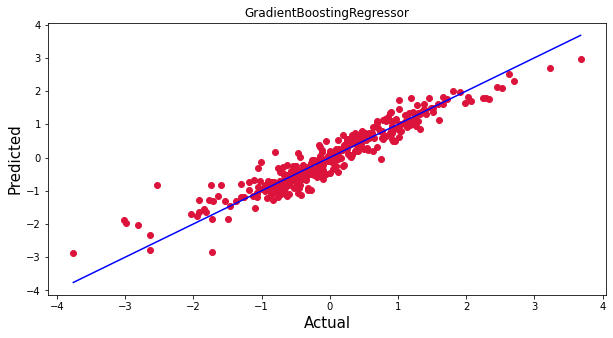

In [145]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("GradientBoostingRegressor")
plt.show()

Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values

In [146]:
#Predicting Sale price of house using cleaned test dataset X_1
Predicted_Sale_Price=model.predict(X_1)
Predicted_Sale_Price

array([ 1.76073433,  0.77327717,  1.17603938, -0.0957798 ,  0.4795028 ,
       -1.4433784 , -0.84006199,  1.4643228 ,  1.1334675 , -0.10527257,
       -1.50712635, -0.55188519, -0.97104685,  0.23704369,  1.22692491,
       -0.78413562, -1.00440063, -0.94500876, -0.06936583,  0.37489451,
       -0.57194868, -0.21512935, -0.32453044, -1.63608945, -1.09906641,
       -0.85675962, -0.15270328, -0.42180157,  0.02773716, -1.73727195,
       -0.76085464,  0.38653821,  0.8093311 ,  0.34822514, -0.9412645 ,
       -0.22995322,  0.12340937, -0.99837539, -0.21188775, -0.33679052,
       -1.25361513,  1.7616159 ,  0.74128451,  0.17906179, -0.73147244,
       -0.58330983, -0.7353859 , -1.33749346,  0.45174911,  1.77362025,
       -0.67415409,  0.66723055, -1.2769562 , -1.3338161 ,  1.19788686,
       -0.79099868, -0.57152406,  0.20726712, -1.07679801,  0.94703703,
       -1.52679641, -0.08012837, -1.05391793, -0.374806  ,  0.52473384,
       -1.49124242, -0.23909814,  0.43879006, -0.50753451,  0.02

In [147]:
#Making dataframe for predicted SalePrice
House_Price_Predictions=pd.DataFrame()
House_Price_Predictions["SalePrice"]=Predicted_Sale_Price
House_Price_Predictions.head(10)

SalePrice
0   1.760734
1   0.773277
2   1.176039
3  -0.095780
4   0.479503
5  -1.443378
6  -0.840062
7   1.464323
8   1.133467
9  -0.105273

In [148]:
#Lets save the predictions to csv
House_Price_Predictions.to_csv("House_Price_Predictions.csv",index=False)

I have saved the predicted values as csv file.